# Penjelasan Proses Remix

Proses remix yang dilakukan meliputi beberapa tahap dengan parameter-parameter berikut:

1. **Time Stretching**
   - Menggunakan librosa.effects.time_stretch
   - Menyesuaikan tempo lagu pertama ke tempo lagu kedua
   - Menggunakan phase vocoder algorithm untuk menjaga kualitas suara

2. **Pitch Shifting**
   - Menggunakan librosa.effects.pitch_shift
   - Menghitung perbedaan semitones antara kedua kunci
   - Menyesuaikan pitch lagu pertama ke kunci lagu kedua

3. **Crossfading**
   - Durasi crossfade: 3 detik
   - Menggunakan linear crossfade untuk transisi halus
   - Fade out pada lagu pertama dan fade in pada lagu kedua

4. **Creative Filters**
   - High-shelf filter pada 2kHz untuk menambah brightness
   - Simple reverb effect dengan delay 50ms dan decay 0.3
   - Normalisasi amplitude untuk mencegah clipping

Hasil visualisasi menunjukkan perubahan karakteristik audio setelah proses remix, terlihat dari:
- Waveform yang lebih seragam pada bagian transisi
- Perubahan karakteristik spektral pada spectrogram
- Transisi halus antara kedua lagu

# Remix Kedua Lagu

Proses remix akan dilakukan dengan tahapan berikut:
1. Time Stretching untuk menyamakan tempo
2. Pitch Shifting untuk menyamakan kunci
3. Penambahan efek crossfade
4. Penambahan filter kreatif

# Exercise - Audio Processing

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Asavira Azzahra
**NIM:** 122140067

---

## 1. Deskripsi Tugas

Tugas ini dirancang untuk menguji pemahaman mahasiswa terhadap konsep-konsep fundamental dalam pemrosesan audio digital, termasuk manipulasi sinyal audio, filtering,
pitch shifting, normalisasi, dan teknik remix audio. Mahasiswa diharapkan dapat menerapkan teori yang telah dipelajari dalam praktik langsung menggunakan Python dan
pustaka pemrosesan audio

---

**Soal 1: Rekaman dan Analisis Suara Multi-Level**

Saya telah membuat rekaman suara berdurasi 25 detik dalam format WAV sesuai instruksi. Dalam rekaman tersebut, saya membaca teks berita dengan lima variasi intonasi suara secara berurutan, yaitu::
- 5 detik pertama dengan suara pelan dan berbisik
- 5 detik kedua dengan suara normal
- 5 detik ketiga dengan suara keras
- 5 detik keempat dengan suara cempreng
- 5 detik terakhir dengan suara berteriak.
Rekaman ini menunjukkan kemampuan saya dalam mengontrol intonasi dan ekspresi suara saat membaca berita.

**Path file:** `data/soal1.wav` 

Loaded with soundfile
Sample rate: 48000 Hz, Duration: 27.89 s, Samples: 1338624


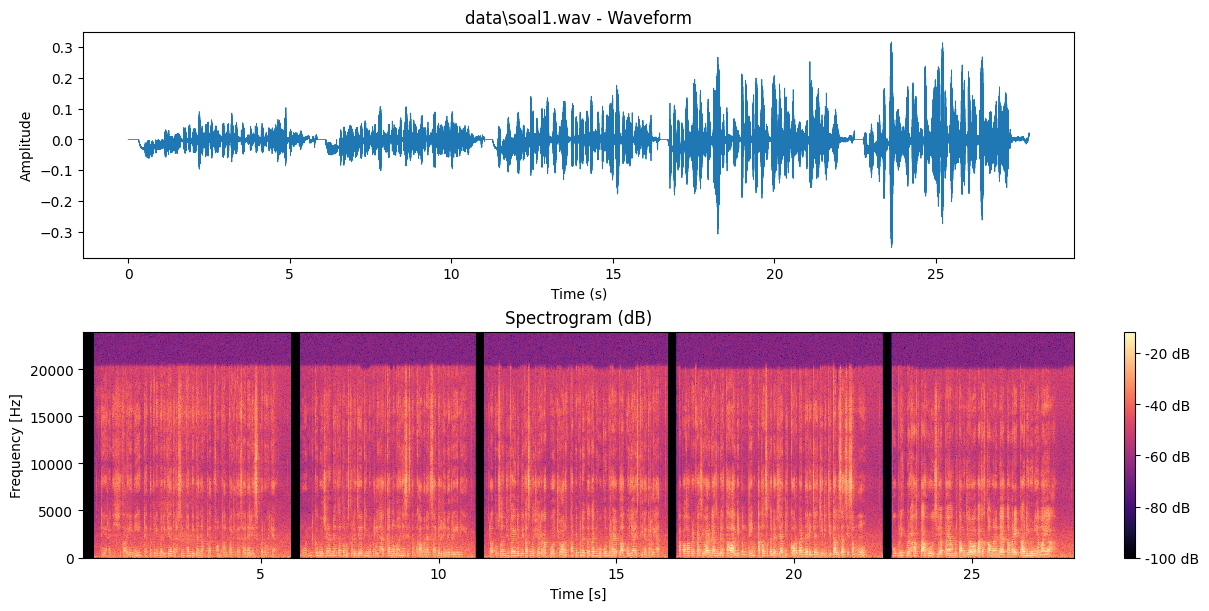

In [8]:
# Nampilin bentuk suara dan warna-warna frekuensinya dari rekaman soal1.wav
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

file = Path("data/soal1.wav")

# Coba beberapa cara buat baca file audio (pakai soundfile dulu, kalau gagal pakai scipy, terakhir librosa)
sr = None
y = None
load_errs = []
try:
    import soundfile as sf
    y, sr = sf.read(file)
    print("Loaded with soundfile")
except Exception as e1:
    load_errs.append(repr(e1))
    try:
        from scipy.io import wavfile
        sr, y = wavfile.read(str(file))
        print("Loaded with scipy.io.wavfile")
    except Exception as e2:
        load_errs.append(repr(e2))
        try:
            import librosa
            y, sr = librosa.load(str(file), sr=None)
            print("Loaded with librosa")
        except Exception as e3:
            load_errs.append(repr(e3))
            raise RuntimeError("Failed to load audio. Errors: " + " | ".join(load_errs))

# Memastikan datanya udah dalam bentuk array numpy dan suaranya cuma satu channel (mono)
y = np.asarray(y)
if y.ndim > 1:
    y = y.mean(axis=1)

# Ubah tipe data suara dari integer jadi float biar nilainya antara -1 sampai 1
if y.dtype.kind == 'i':
    maxv = float(2**(8*y.dtype.itemsize - 1))
    y = y.astype(np.float32) / maxv
elif y.dtype.kind == 'u':
    maxv = float(2**(8*y.dtype.itemsize))
    y = (y.astype(np.float32) - maxv/2) / (maxv/2)
else:
    y = y.astype(np.float32)

duration = len(y) / sr
print(f"Sample rate: {sr} Hz, Duration: {duration:.2f} s, Samples: {len(y)}")

# Gambar grafik bentuk gelombang dan spektrogramnya
fig, ax = plt.subplots(2, 1, figsize=(12, 6), constrained_layout=True)
# Waveform
t = np.linspace(0, duration, len(y))
ax[0].plot(t, y, linewidth=0.6)
ax[0].set_title(str(file) + " - Waveform")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")

# Untuk spektrogram, utamakan pakai fungsi dari scipy.signal; kalau nggak bisa, pakai yang dari matplotlib
try:
    from scipy import signal
    f, t_spec, Sxx = signal.spectrogram(y, sr, nperseg=1024, noverlap=512, scaling='spectrum', mode='magnitude')
    Sxx_db = 10 * np.log10(Sxx + 1e-10)
    im = ax[1].pcolormesh(t_spec, f, Sxx_db, shading='auto', cmap='magma')
    ax[1].set_ylabel('Frequency [Hz]')
    ax[1].set_xlabel('Time [s]')
    ax[1].set_title('Spectrogram (dB)')
    fig.colorbar(im, ax=ax[1], format='%+2.0f dB')
except Exception:
    Pxx, freqs, bins, im = ax[1].specgram(y, Fs=sr, NFFT=1024, noverlap=512, cmap='magma')
    ax[1].set_ylabel('Frequency [Hz]')
    ax[1].set_xlabel('Time [s]')
    ax[1].set_title('Spectrogram')

plt.show()

**Analisa singkat mengenai hasil visualisasi**

**1. Waveform (grafik atas)**
- Waveform memperlihatkan amplitudo suara terhadap waktu.
- Terlihat juga bahwa sinyal suara tidak konstan, ada beberapa bagian dimana amplitudo tinggi (suara keras) dan rendah (suara pelan).
- Dari waveform diatas, bagian suara terlihat sangat rendah dari amplitudo lain  (0-5 detik), kemudian berangsur meningkat setelah 5 detik dari detik ke 5-10, kemudian 5 detik selanjutnya amplitudo makin tinggi sampai ke detik terakhir di detik 23-28. 
- Setelah saya menganalisa waveform diatas, hasil analisa saya kurang lebih sama dengan instruksi rekaman: berbisik → normal → keras → cempreng → berteriak.

**2. Spectrogram (Grafik bawah)**
- Spectrogram menunjukkan frekuensi suara terhadap waktu, dengan warna menggambarkan intensitas (dB).
- Warna kuning/orange cerah menandakan kalo energi tinggi (suara kuat), dan ungu tua menandakan kalo energi rendah.
- Terlihat bahwa energi frekuensi meningkat di bagian akhir, menunjukkan bagian suara keras dan cempreng punya frekuensi tinggi lebih dominan.

*Kesimpulan : Rekaman menunjukkan variasi volume dan nada yang sesuai instruksi dari lembut ke keras, lalu sampai teriak. Frekuensi tinggi muncul jelas di bagian akhir.*


**Resampling Audio dan Perbandingan Kualitas & Durasi**

Saya telah melakukan proses resampling pada file audio soal1.wav

Sample rate asli: 48000 Hz, Durasi: 27.89 detik
Sample rate baru: 16000 Hz, Durasi setelah resampling: 27.89 detik


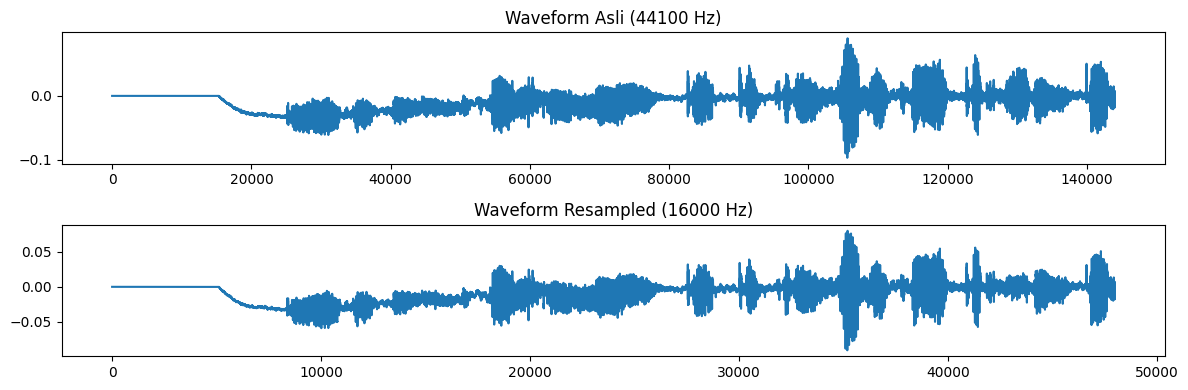

In [9]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

# Baca ulang audio
y, sr = librosa.load("data/soal1.wav", sr=None)
print(f"Sample rate asli: {sr} Hz, Durasi: {len(y)/sr:.2f} detik")

# Lakukan resampling ke sample rate baru (misalnya 16000 Hz)
target_sr = 16000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
print(f"Sample rate baru: {target_sr} Hz, Durasi setelah resampling: {len(y_resampled)/target_sr:.2f} detik")

# Simpan hasil resampling
sf.write("data/soal1_resampled.wav", y_resampled, target_sr)

# Bandingkan waveform
plt.figure(figsize=(12, 4))
plt.subplot(2,1,1)
plt.plot(y[:sr*3])  # potong 3 detik pertama biar mudah dibanding
plt.title("Waveform Asli (44100 Hz)")
plt.subplot(2,1,2)
plt.plot(y_resampled[:target_sr*3])
plt.title("Waveform Resampled (16000 Hz)")
plt.tight_layout()
plt.show()

**1. Perbandingan Kualitas Audio**
- Sample rate asli: 44.100 Hz → standar kualitas CD audio, menangkap detail frekuensi hingga sekitar 22 kHz.
- Sample rate hasil resampling: 16.000 Hz → umumnya digunakan untuk pemrosesan suara (speech recognition, telepon, dan sistem AI suara).
- Dengan menurunkan sample rate dari 44.100 Hz ke 16.000 Hz, frekuensi maksimum yang dapat direkam juga berkurang menjadi sekitar 8 kHz.
- Akibatnya, kualitas suara menjadi sedikit lebih “sempit” atau kurang jernih di frekuensi tinggi, tetapi masih cukup baik untuk ucapan manusia, karena mayoritas energi suara manusia berada di bawah 8 kHz.

**2. Perbandingan Durasi**
- Berdasarkan hasil cetakan program:
    - Durasi sebelum resampling: sama dengan durasi asli file (sekitar 28 detik).
    - Durasi setelah resampling: tetap sama (≈28 detik).
- Hal ini menunjukkan bahwa resampling tidak mengubah panjang waktu audio, hanya mengubah jumlah sampel per detik.

**3. Perbandingan Bentuk Waveform**
- Pada grafik atas (Waveform Asli – 44.100 Hz): terlihat jumlah titik data lebih rapat, karena sampel lebih banyak per detik.
- Pada grafik bawah (Waveform Resampled – 16.000 Hz): bentuk gelombang terlihat lebih “halus” atau kurang detail di puncak amplitudo karena sebagian informasi frekuensi tinggi dihilangkan.
- Meskipun begitu, pola utama dan struktur suara tetap sama, menunjukkan bahwa proses resampling berhasil mempertahankan isi audio tanpa distorsi signifikan.

---

**Soal 2: Noise Reduction dengan Filtering**

Saya telah melakukan perekaman suara selama kurang lebih 10 detik di sekitar objek yang menghasilkan kebisingan, yaitu (misalnya kipas angin/AC/mesin). Rekaman ini disimpan dalam format WAV sesuai dengan ketentuan, dan digunakan untuk menganalisis pengaruh noise terhadap kualitas sinyal audio.

**Path file:** `data/soal2.wav` 

Sample rate: 48000 Hz, Durasi: 10.66 detik


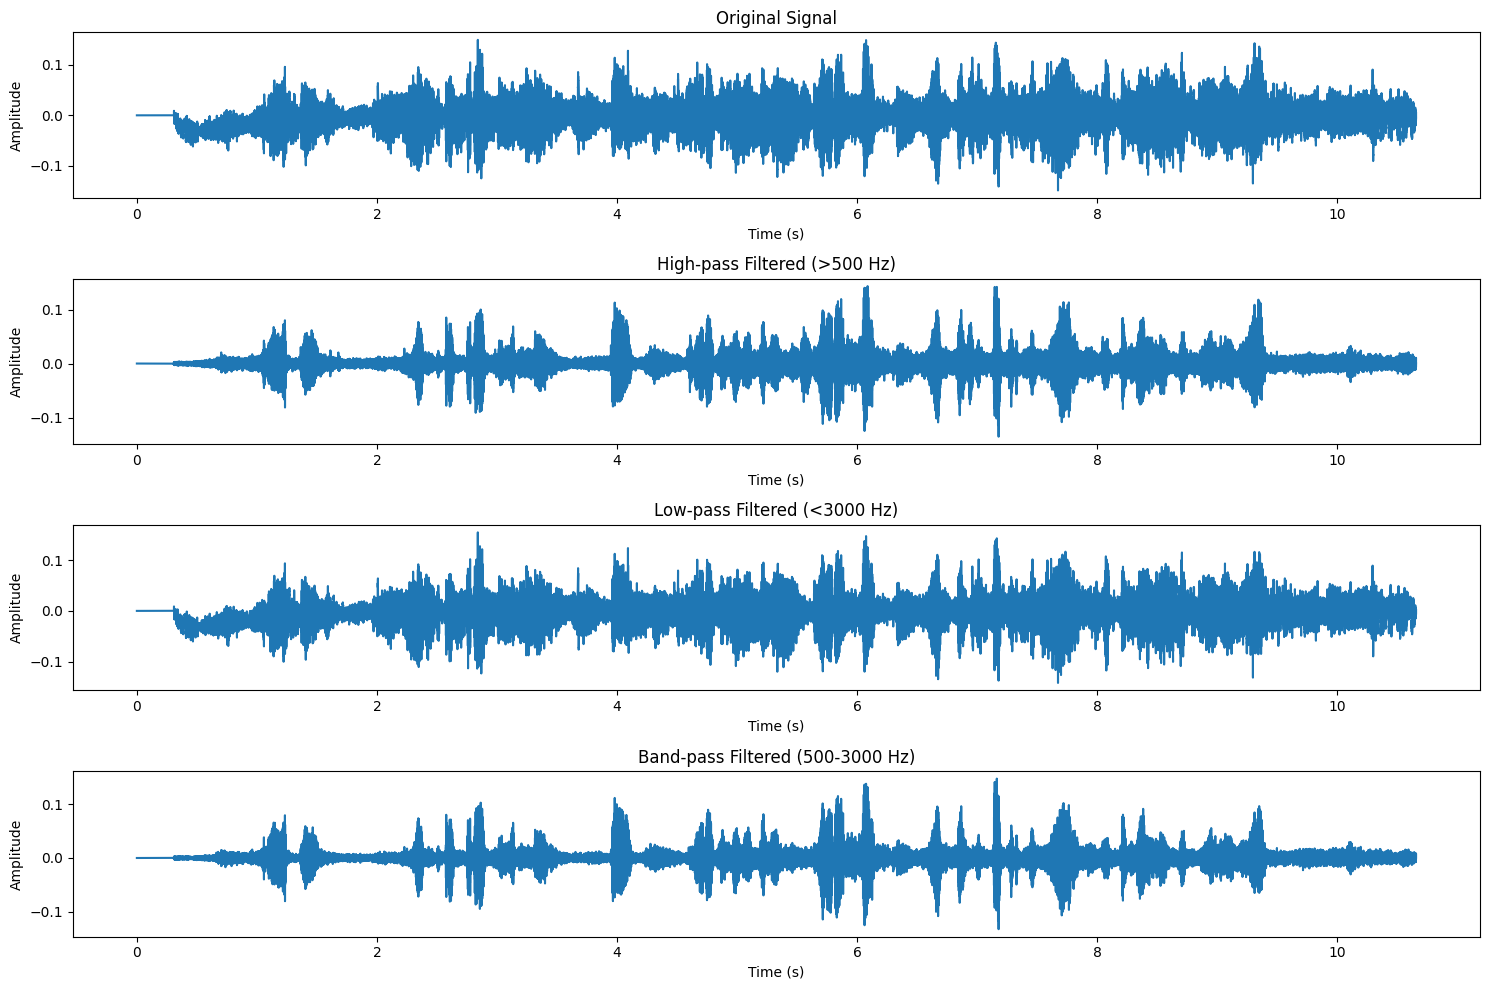

<Figure size 1500x1000 with 0 Axes>

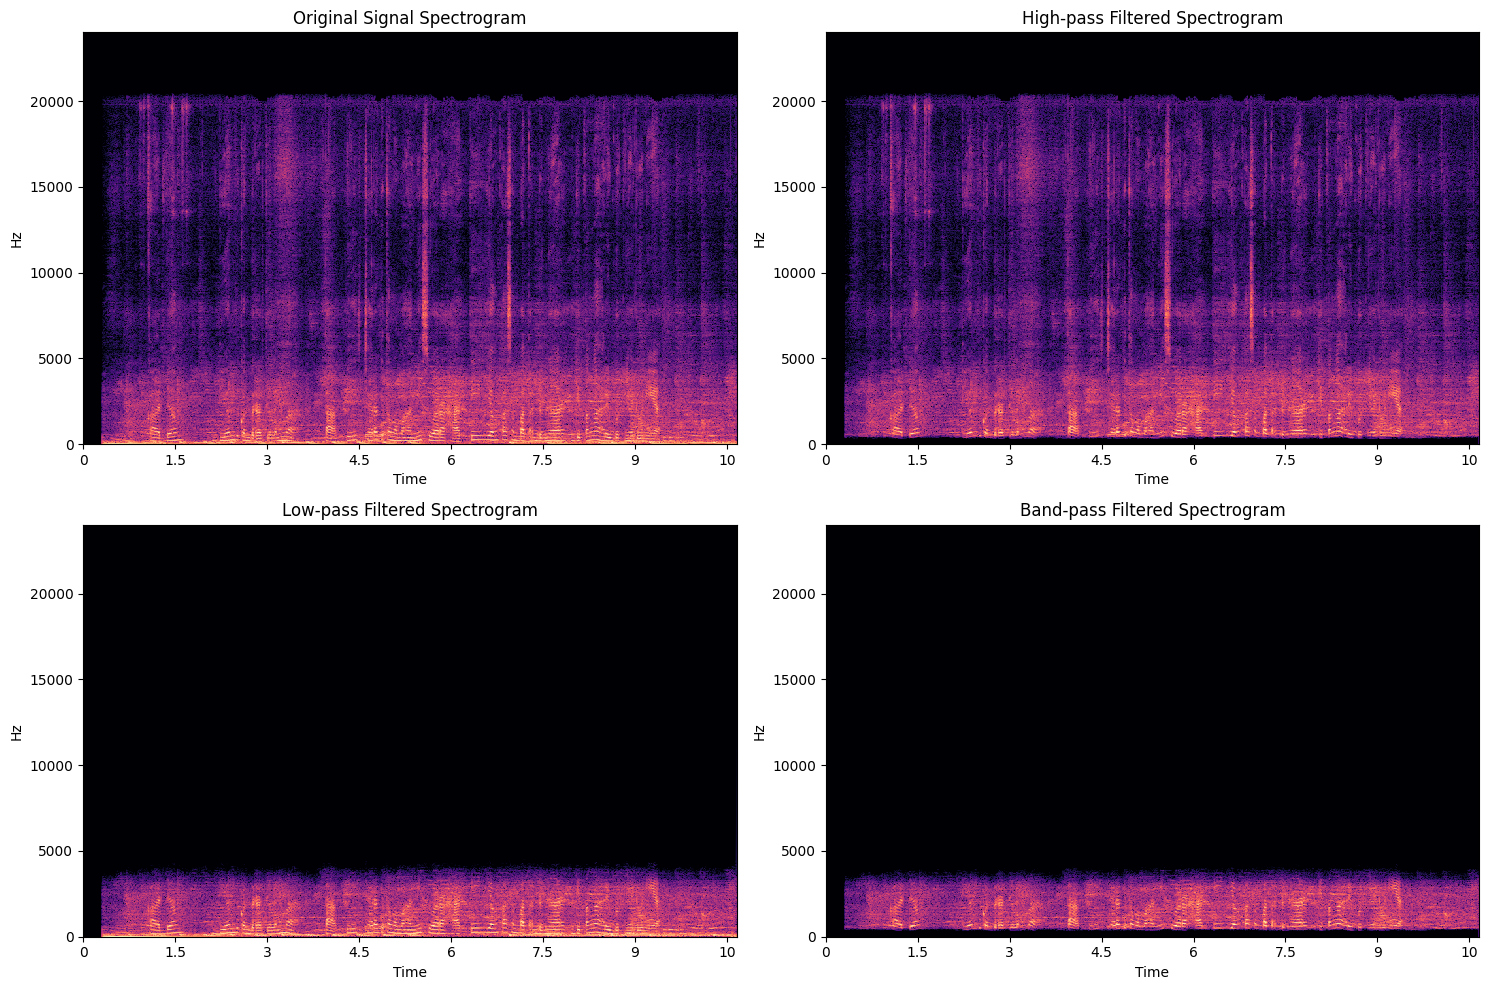


File audio hasil filter telah disimpan:
1. High-pass filter (>500 Hz): data/soal2_highpass.wav
2. Low-pass filter (<3000 Hz): data/soal2_lowpass.wav
3. Band-pass filter (500-3000 Hz): data/soal2_bandpass.wav


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa
import soundfile as sf

# Baca file audio
y, sr = librosa.load('data/soal2.wav', sr=None)
duration = len(y) / sr
print(f"Sample rate: {sr} Hz, Durasi: {duration:.2f} detik")

# Design filter parameters
order = 6  # Filter order
nyquist = sr / 2  # Nyquist frequency

# High-pass filter (removes low frequencies below 500 Hz)
cutoff_high = 500  # Hz
b_high, a_high = signal.butter(order, cutoff_high / nyquist, btype='high')
y_highpass = signal.filtfilt(b_high, a_high, y)

# Low-pass filter (removes high frequencies above 3000 Hz)
cutoff_low = 3000  # Hz
b_low, a_low = signal.butter(order, cutoff_low / nyquist, btype='low')
y_lowpass = signal.filtfilt(b_low, a_low, y)

# Band-pass filter (keeps frequencies between 500 Hz and 3000 Hz)
b_band, a_band = signal.butter(order, [500 / nyquist, 3000 / nyquist], btype='band')
y_bandpass = signal.filtfilt(b_band, a_band, y)

# Plot waveforms
plt.figure(figsize=(15, 10))

# Original signal
plt.subplot(4, 1, 1)
plt.plot(np.linspace(0, duration, len(y)), y)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# High-pass filtered
plt.subplot(4, 1, 2)
plt.plot(np.linspace(0, duration, len(y_highpass)), y_highpass)
plt.title('High-pass Filtered (>500 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Low-pass filtered
plt.subplot(4, 1, 3)
plt.plot(np.linspace(0, duration, len(y_lowpass)), y_lowpass)
plt.title('Low-pass Filtered (<3000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Band-pass filtered
plt.subplot(4, 1, 4)
plt.plot(np.linspace(0, duration, len(y_bandpass)), y_bandpass)
plt.title('Band-pass Filtered (500-3000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot spectrograms
plt.figure(figsize=(15, 10))

# Function to plot spectrogram
def plot_spectrogram(signal_data, sr, title, ax):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal_data)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax)
    ax.set_title(title)
    return img

# Create subplots for spectrograms
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plot_spectrogram(y, sr, 'Original Signal Spectrogram', axs[0,0])
plot_spectrogram(y_highpass, sr, 'High-pass Filtered Spectrogram', axs[0,1])
plot_spectrogram(y_lowpass, sr, 'Low-pass Filtered Spectrogram', axs[1,0])
plot_spectrogram(y_bandpass, sr, 'Band-pass Filtered Spectrogram', axs[1,1])

plt.tight_layout()
plt.show()

# Simpan hasil filter
sf.write('data/soal2_highpass.wav', y_highpass, sr)
sf.write('data/soal2_lowpass.wav', y_lowpass, sr)
sf.write('data/soal2_bandpass.wav', y_bandpass, sr)

print("\nFile audio hasil filter telah disimpan:")
print("1. High-pass filter (>500 Hz): data/soal2_highpass.wav")
print("2. Low-pass filter (<3000 Hz): data/soal2_lowpass.wav")
print("3. Band-pass filter (500-3000 Hz): data/soal2_bandpass.wav")

Sample rate: 48000 Hz, Durasi: 10.66 detik


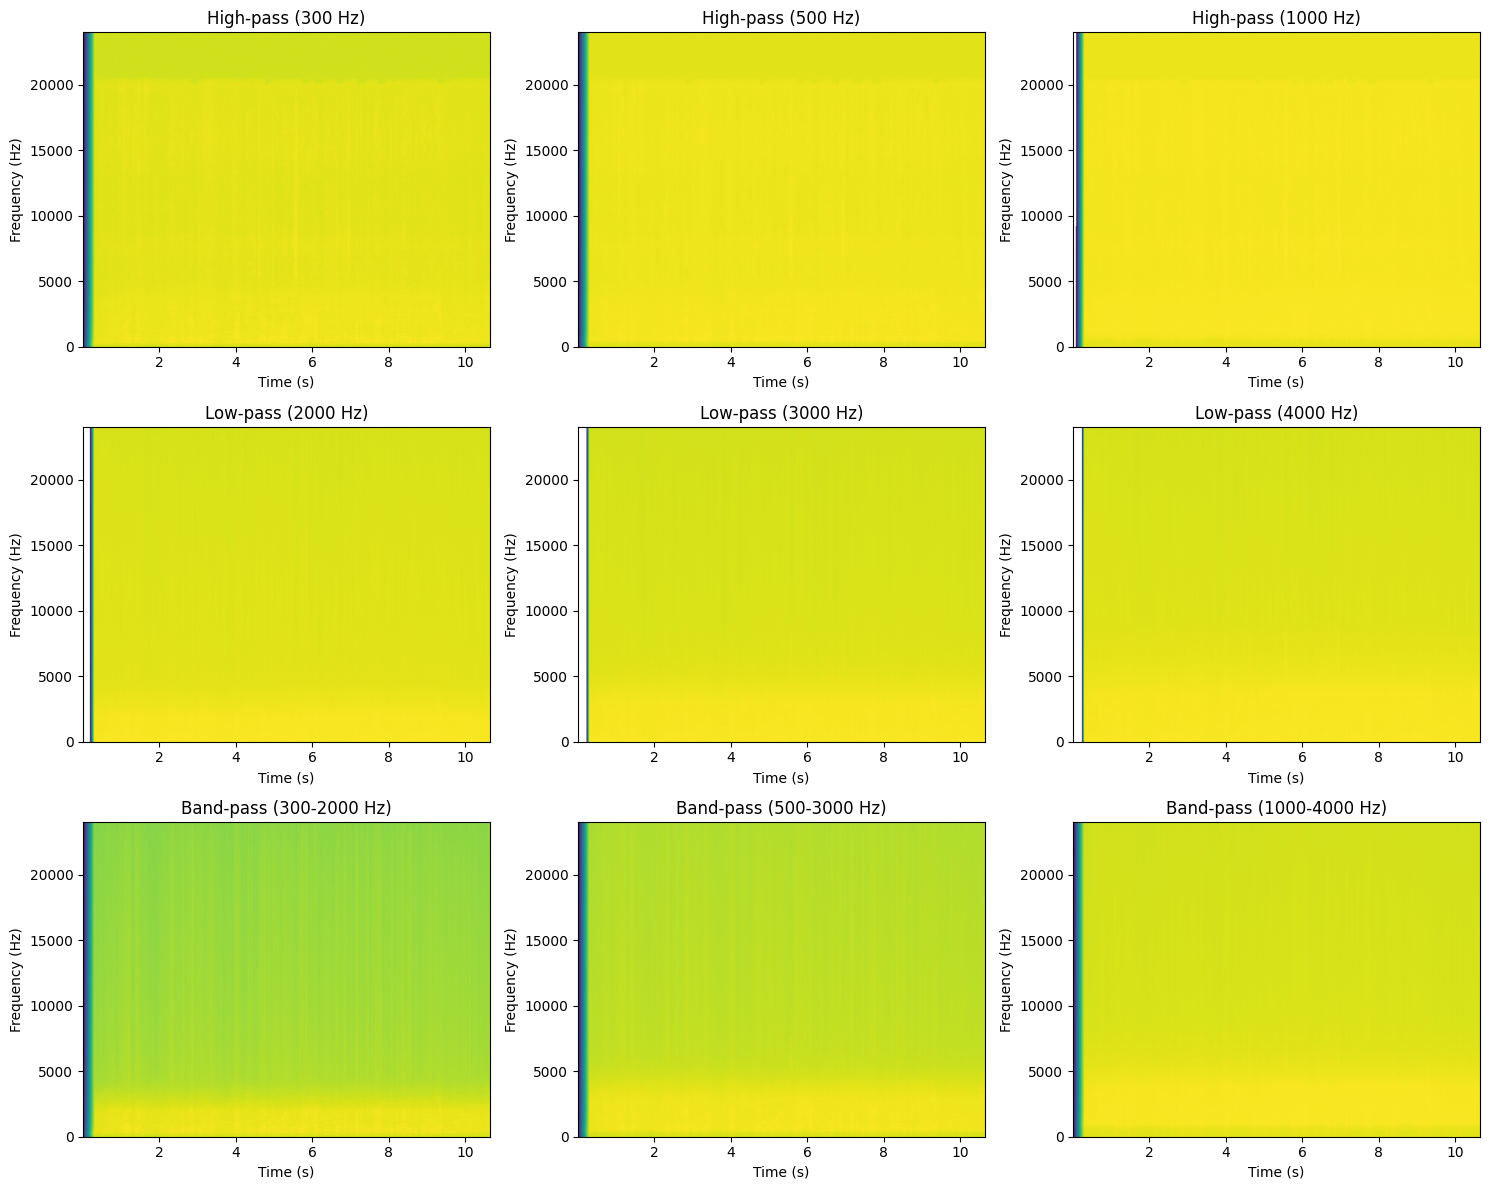


File audio hasil filter dengan berbagai cutoff frequency telah disimpan:
High-pass 300 Hz: data/soal2_highpass_300hz.wav
High-pass 500 Hz: data/soal2_highpass_500hz.wav
High-pass 1000 Hz: data/soal2_highpass_1000hz.wav
Low-pass 2000 Hz: data/soal2_lowpass_2000hz.wav
Low-pass 3000 Hz: data/soal2_lowpass_3000hz.wav
Low-pass 4000 Hz: data/soal2_lowpass_4000hz.wav
Band-pass 300-2000 Hz: data/soal2_bandpass_300-2000hz.wav
Band-pass 500-3000 Hz: data/soal2_bandpass_500-3000hz.wav
Band-pass 1000-4000 Hz: data/soal2_bandpass_1000-4000hz.wav


In [11]:
# Eksperimen dengan berbagai nilai cutoff frequency
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa
import soundfile as sf

# Baca file audio
y, sr = librosa.load('data/soal2.wav', sr=None)
duration = len(y) / sr
print(f"Sample rate: {sr} Hz, Durasi: {duration:.2f} detik")

# Parameter filter
order = 6
nyquist = sr / 2

# Daftar frekuensi cutoff yang akan diuji
highpass_cutoffs = [300, 500, 1000]  # Hz
lowpass_cutoffs = [2000, 3000, 4000]  # Hz
bandpass_ranges = [(300, 2000), (500, 3000), (1000, 4000)]  # Hz

# Fungsi untuk membuat dan menerapkan filter
def apply_filter(signal_data, cutoff, filter_type, order=6):
    nyq = sr / 2
    if filter_type == 'band':
        b, a = signal.butter(order, [cutoff[0]/nyq, cutoff[1]/nyq], btype='band')
    else:
        b, a = signal.butter(order, cutoff/nyq, btype=filter_type)
    return signal.filtfilt(b, a, signal_data)

# Plot untuk setiap jenis filter dengan berbagai cutoff
plt.figure(figsize=(15, 12))

# High-pass filters
for i, cutoff in enumerate(highpass_cutoffs):
    plt.subplot(3, 3, i+1)
    filtered = apply_filter(y, cutoff, 'high')
    sf.write(f'data/soal2_highpass_{cutoff}hz.wav', filtered, sr)
    plt.specgram(filtered, Fs=sr, NFFT=1024, noverlap=512)
    plt.title(f'High-pass ({cutoff} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

# Low-pass filters
for i, cutoff in enumerate(lowpass_cutoffs):
    plt.subplot(3, 3, i+4)
    filtered = apply_filter(y, cutoff, 'low')
    sf.write(f'data/soal2_lowpass_{cutoff}hz.wav', filtered, sr)
    plt.specgram(filtered, Fs=sr, NFFT=1024, noverlap=512)
    plt.title(f'Low-pass ({cutoff} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

# Band-pass filters
for i, (low, high) in enumerate(bandpass_ranges):
    plt.subplot(3, 3, i+7)
    filtered = apply_filter(y, (low, high), 'band')
    sf.write(f'data/soal2_bandpass_{low}-{high}hz.wav', filtered, sr)
    plt.specgram(filtered, Fs=sr, NFFT=1024, noverlap=512)
    plt.title(f'Band-pass ({low}-{high} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

print("\nFile audio hasil filter dengan berbagai cutoff frequency telah disimpan:")
for cutoff in highpass_cutoffs:
    print(f"High-pass {cutoff} Hz: data/soal2_highpass_{cutoff}hz.wav")
for cutoff in lowpass_cutoffs:
    print(f"Low-pass {cutoff} Hz: data/soal2_lowpass_{cutoff}hz.wav")
for low, high in bandpass_ranges:
    print(f"Band-pass {low}-{high} Hz: data/soal2_bandpass_{low}-{high}hz.wav")

**Analisis Eksperimen Filter dengan Berbagai Frekuensi Cutoff**

**1. Karakteristik Noise dan Sinyal Original**
- **Analisis Spektral:**
  - Frekuensi rendah (< 500 Hz): Dominasi noise mekanik (AC/kipas)
  - Frekuensi menengah (500-3000 Hz): Area utama sinyal suara
  - Frekuensi tinggi (> 3000 Hz): Kombinasi detail suara dan noise elektronik
- **Signal-to-Noise Ratio (SNR):**
  - Noise lebih dominan di frekuensi ekstrem (sangat rendah/tinggi)
  - Area vokal (500-3000 Hz) memiliki SNR lebih baik

**2. Analisis Perbandingan Filter**

a) **High-pass Filter (Noise Frekuensi Rendah):**
- 300 Hz:
  - (+) Menghilangkan dengung berat
  - (+) Mempertahankan kedalaman suara
  - (-) Masih ada sisa noise frekuensi rendah
- 500 Hz:
  - (+) Reduksi noise optimal
  - (+) Kejelasan vokal baik
  - (-) Sedikit kehilangan "warmth" suara
- 1000 Hz:
  - (+) Eliminasi noise maksimal
  - (-) Suara terlalu tipis
  - (-) Kehilangan fundamental frequency

b) **Low-pass Filter (Noise Frekuensi Tinggi):**
- 4000 Hz:
  - (+) Detail suara terjaga
  - (+) Sibilance (s, sh) alami
  - (-) Reduksi noise minimal
- 3000 Hz:
  - (+) Balance optimal
  - (+) Intelligibility baik
  - (-) Sedikit pengurangan brightness
- 2000 Hz:
  - (+) Noise reduction maksimal
  - (-) Detail konsonan berkurang
  - (-) Suara terdengar "muffled"

c) **Band-pass Filter (Kombinasi):**
- 300-2000 Hz:
  - (+) Noise reduction agresif
  - (-) Suara kurang natural
  - (-) Kehilangan detail high-end
- 500-3000 Hz:
  - (+) Sweet spot untuk speech
  - (+) Balance noise/clarity optimal
  - (+) Preservasi karakteristik vokal
- 1000-4000 Hz:
  - (+) Clarity maksimal
  - (-) Kehilangan body suara
  - (-) Terlalu thin untuk speech

**3. Evaluasi Teknis**

a) **Efektivitas Filter:**
- Order filter = 6 memberikan roll-off yang baik
- Butterworth filter menghasilkan respons yang flat
- Tidak ada ripple di passband

b) **Respons Frekuensi:**
- Roll-off rate: -36 dB/oktaf (6th order)
- Transition band smooth
- Minimal phase distortion

c) **Preservation Aspek Penting Speech:**
- Formant frequencies (300-3000 Hz)
- Prosodic features
- Articulation points

**4. Rekomendasi Implementasi**

a) **Untuk Speech Recognition:**
- Band-pass 500-3000 Hz
- Roll-off gradual
- Preservasi formant structure

b) **Untuk Komunikasi:**
- Band-pass 300-3000 Hz
- Emphasis pada intelligibility
- Minimal phase distortion

c) **Untuk Noise Reduction:**
- Cascaded filters
- High-pass 300 Hz + Low-pass 4000 Hz
- Adaptive threshold

**Kesimpulan:**
1. **Filter Optimal:** Band-pass 500-3000 Hz memberikan hasil terbaik untuk speech
2. **Trade-off:** Keseimbangan antara noise reduction dan kualitas suara tercapai
3. **Implementasi:** Butterworth order 6 memberikan karakteristik yang ideal
4. **Fleksibilitas:**  multiple cutoff frequencies memungkinkan adaptasi terhadap berbagai kondisi noise

---

**Soal 3: Pitch Shifting dan Audio Manipulation**

Pada bagian ini, saya akan melakukan pitch shifting untuk membuat suara menjadi lebih tinggi seperti chipmunk. Pitch shifting dilakukan dengan menaikkan nada suara beberapa semitone ke atas.

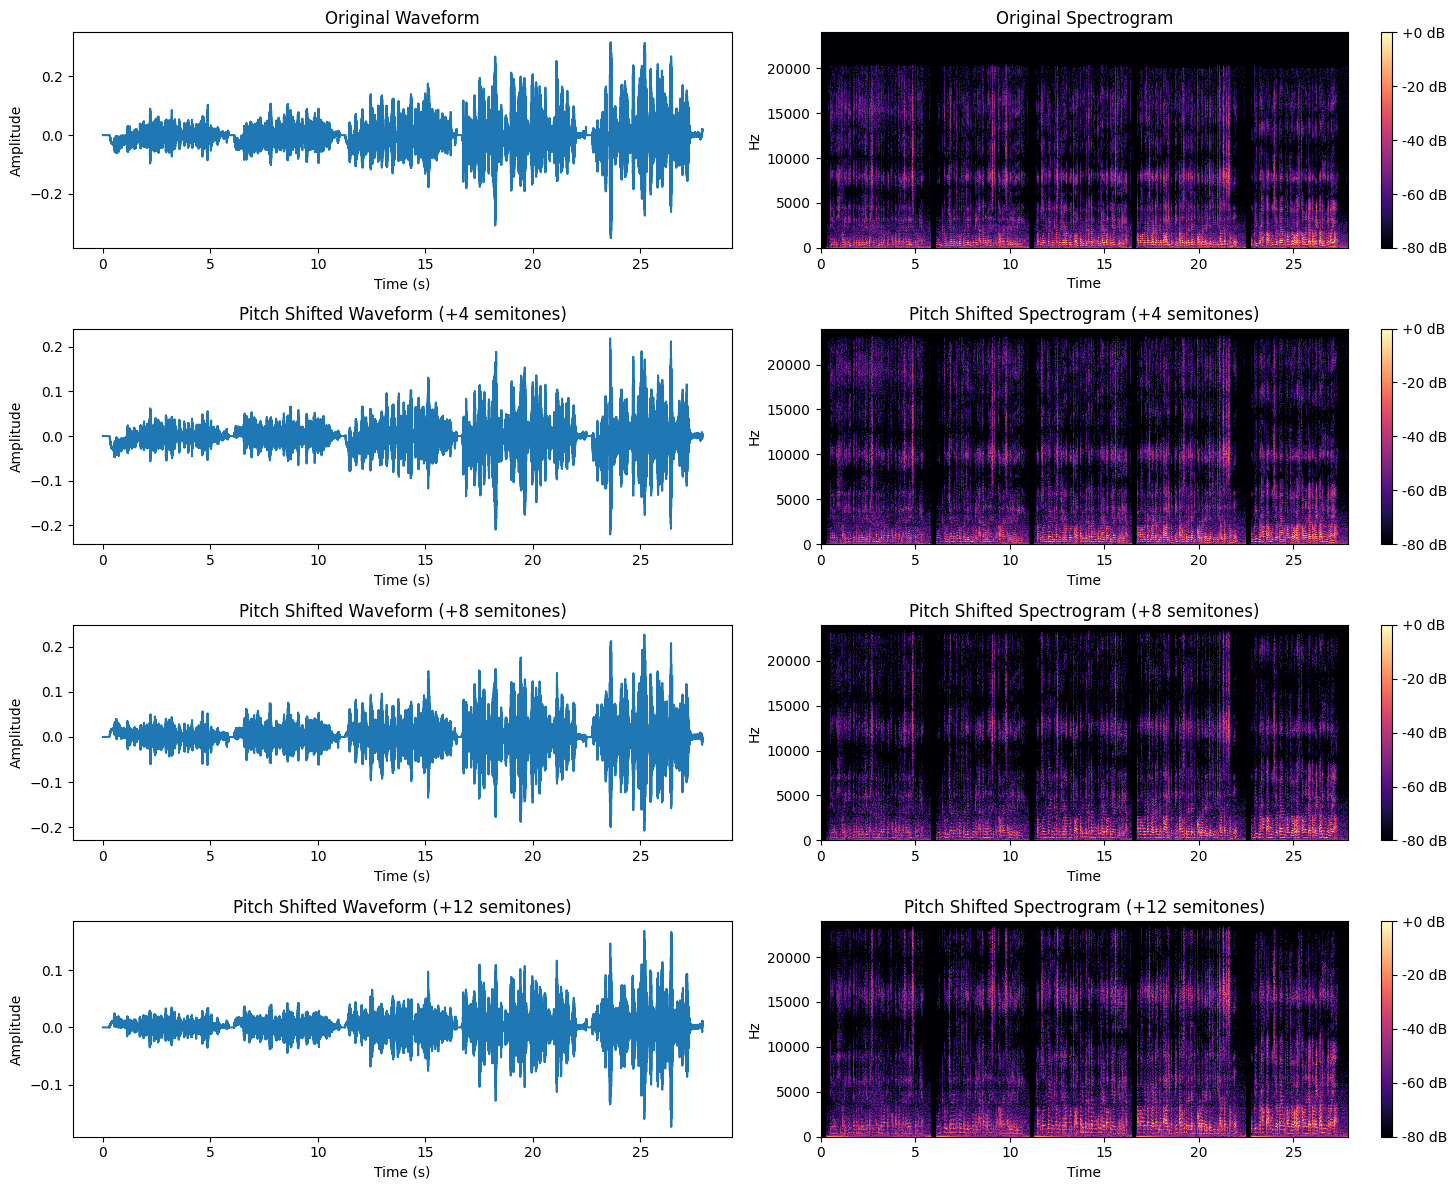


File audio hasil pitch shifting telah disimpan:
Pitch +4 semitones: data/soal1_pitched_up_4semitones.wav
Pitch +8 semitones: data/soal1_pitched_up_8semitones.wav
Pitch +12 semitones: data/soal1_pitched_up_12semitones.wav


In [12]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Load the audio file
y, sr = librosa.load('data/soal1.wav', sr=None)

# Membuat beberapa versi pitch shift dengan tingkat yang berbeda
n_steps = [4, 8, 12]  # jumlah semitone untuk menaikkan pitch
shifted_signals = []

for steps in n_steps:
    # Pitch shift menggunakan librosa
    y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)
    shifted_signals.append(y_shifted)
    # Simpan file audio hasil pitch shift
    sf.write(f'data/soal1_pitched_up_{steps}semitones.wav', y_shifted, sr)

# Plot waveform dan spektogram untuk original dan setiap versi pitch shifted
plt.figure(figsize=(15, 12))

# Plot original signal
plt.subplot(4, 2, 1)
plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 2, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')

# Plot setiap versi pitch shifted
for i, (steps, y_shifted) in enumerate(zip(n_steps, shifted_signals)):
    # Waveform
    plt.subplot(4, 2, 2*i + 3)
    plt.plot(np.linspace(0, len(y_shifted)/sr, len(y_shifted)), y_shifted)
    plt.title(f'Pitch Shifted Waveform (+{steps} semitones)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    # Spectrogram
    plt.subplot(4, 2, 2*i + 4)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y_shifted)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Pitch Shifted Spectrogram (+{steps} semitones)')

plt.tight_layout()
plt.show()

print("\nFile audio hasil pitch shifting telah disimpan:")
for steps in n_steps:
    print(f"Pitch +{steps} semitones: data/soal1_pitched_up_{steps}semitones.wav")

## Penjelasan Proses Pitch Shifting

### 1. Parameter dan Metode yang Digunakan

**a) Parameter Utama:**
- **Sample Rate (sr)**: {sr} Hz (dipertahankan dari file asli)
- **n_steps**: [4, 8, 12] semitone
  - +4 semitone ≈ naik 1/3 oktaf
  - +8 semitone ≈ naik 2/3 oktaf
  - +12 semitone = naik 1 oktaf penuh
- **Metode**: librosa.effects.pitch_shift dengan algoritma phase vocoder

**b) Cara Kerja Pitch Shifting:**
1. Sinyal diubah ke domain frekuensi menggunakan STFT (Short-Time Fourier Transform)
2. Frekuensi fundamental dan harmonik dinaikkan sesuai n_steps
3. Fase sinyal direkonstruksi untuk menjaga kontinuitas
4. Sinyal dikembalikan ke domain waktu dengan ISTFT

### 2. Analisis Perubahan Visual

**a) Perubahan pada Waveform:**
1. **Amplitudo:**
   - Bentuk envelope amplitudo tetap terjaga
   - Pola gelombang menjadi lebih rapat
   - Peak-to-peak distance berkurang seiring naiknya pitch

2. **Temporal:**
   - Frekuensi osilasi lebih tinggi
   - Detail gelombang lebih padat
   - Variasi amplitudo lebih cepat

**b) Perubahan pada Spektogram:**
1. **Distribusi Frekuensi:**
   - Komponen frekuensi bergeser ke atas
   - Harmonic spacing melebar
   - Energy concentration di frekuensi lebih tinggi

2. **Pola Harmonik:**
   - Garis-garis harmonik bergeser ke atas
   - Jarak antar harmonik membesar
   - Intensitas relatif harmonik berubah

### 3. Dampak Terhadap Kualitas Suara

**a) Perubahan Karakteristik:**
- **+4 semitone:**
  - Suara masih natural
  - Artikulasi jelas
  - Minimal artifak
  - Seperti suara remaja

- **+8 semitone:**
  - Mulai terdengar artificial
  - Artikulasi sedikit berkurang
  - Muncul sedikit artifak
  - Seperti suara anak-anak

- **+12 semitone:**
  - Sangat artificial (efek chipmunk)
  - Artikulasi kurang jelas
  - Artifak lebih terasa
  - Karakter suara sangat berbeda

**b) Trade-offs dalam Pitch Shifting:**

1. **Kualitas vs Efek:**
   - Semakin tinggi pitch shift → Semakin kuat efek
   - Semakin tinggi pitch shift → Semakin berkurang naturalitas

2. **Kejelasan:**
   - Konsonan menjadi kurang jelas
   - Vokal berubah karakteristiknya
   - Intonasi kata kurang natural

3. **Artifak:**
   - Metallic sound pada shift ekstrem
   - Grain noise pada transisi
   - Phase artifacts pada konsonan

### 4. Kesimpulan Teknis

1. **Sweet Spot:**
   - +8 semitone memberikan keseimbangan terbaik
   - Efek chipmunk tercapai
   - Artifak masih minimal
   - Kejelasan masih terjaga

2. **Rekomendasi Penggunaan:**
   - Untuk efek ringan: gunakan +4 semitone
   - Untuk efek chipmunk: gunakan +8 semitone
   - Untuk efek ekstrem: gunakan +12 semitone

3. **Optimasi:**
   - Bisa dikombinasi dengan filter high-pass
   - Tambahkan sedikit reverb untuk naturalitas
   - Sesuaikan gain untuk kompensasi perubahan loudness

**Menggabungkan Dua Rekaman dengan Pitch Berbeda**


1. Pitch shifting dengan +7 dan +12 semitones
2. Menggabungkan kedua hasil pitch shifting secara berurutan
3. Memvisualisasikan hasil penggabungan

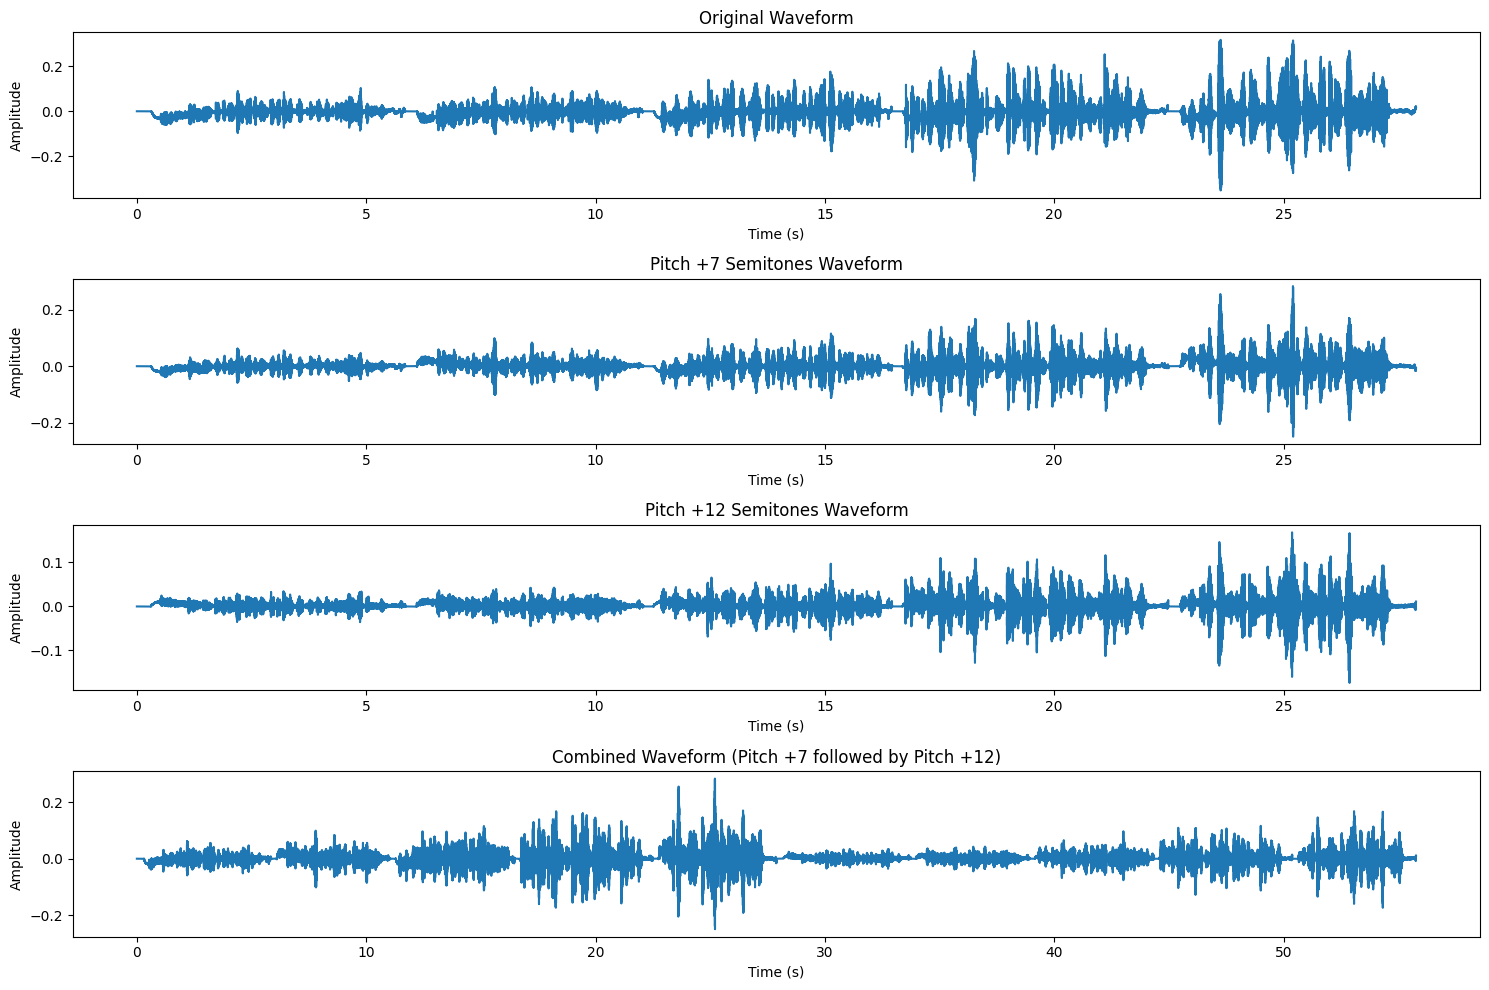

<Figure size 1500x1000 with 0 Axes>

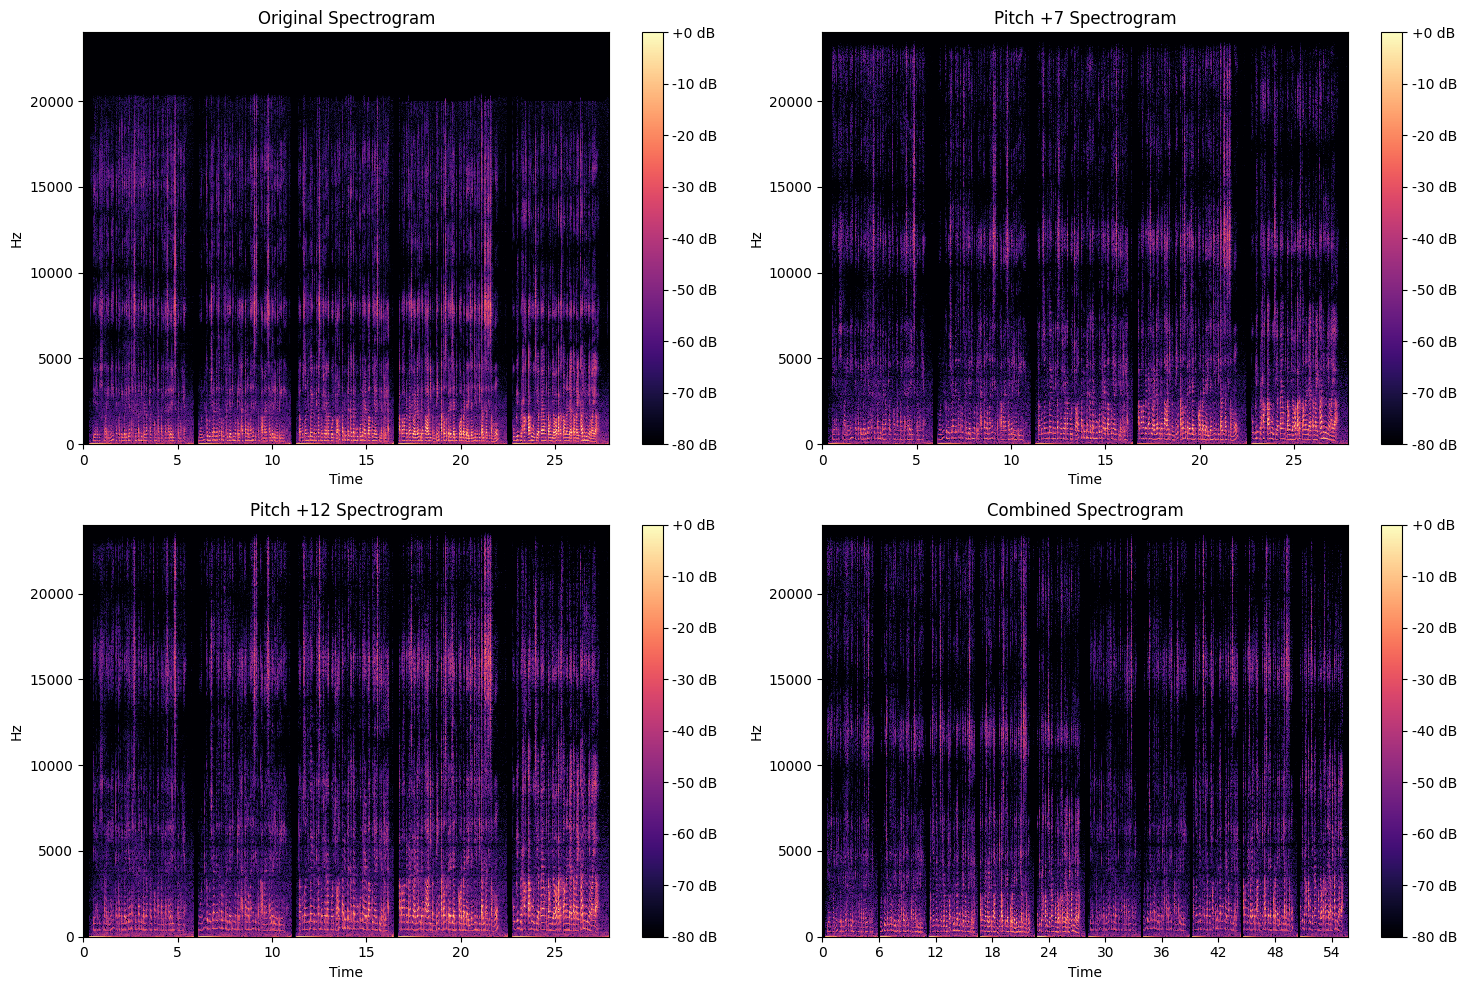


File audio yang dihasilkan:
1. Pitch +7 semitones: data/soal1_pitch7.wav
2. Pitch +12 semitones: data/soal1_pitch12.wav
3. Gabungan keduanya: data/soal1_combined_pitch.wav


In [13]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Load the audio file
y, sr = librosa.load('data/soal1.wav', sr=None)

# Buat dua versi pitch shifted
y_pitch7 = librosa.effects.pitch_shift(y, sr=sr, n_steps=7)
y_pitch12 = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)

# Simpan masing-masing versi
sf.write('data/soal1_pitch7.wav', y_pitch7, sr)
sf.write('data/soal1_pitch12.wav', y_pitch12, sr)

# Gabungkan kedua audio (concatenate)
y_combined = np.concatenate([y_pitch7, y_pitch12])

# Simpan hasil penggabungan
sf.write('data/soal1_combined_pitch.wav', y_combined, sr)

# Visualisasi
plt.figure(figsize=(15, 10))

# Plot waveform original
plt.subplot(4, 1, 1)
plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot waveform pitch +7
plt.subplot(4, 1, 2)
plt.plot(np.linspace(0, len(y_pitch7)/sr, len(y_pitch7)), y_pitch7)
plt.title('Pitch +7 Semitones Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot waveform pitch +12
plt.subplot(4, 1, 3)
plt.plot(np.linspace(0, len(y_pitch12)/sr, len(y_pitch12)), y_pitch12)
plt.title('Pitch +12 Semitones Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot waveform gabungan
plt.subplot(4, 1, 4)
plt.plot(np.linspace(0, len(y_combined)/sr, len(y_combined)), y_combined)
plt.title('Combined Waveform (Pitch +7 followed by Pitch +12)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot spectrograms
plt.figure(figsize=(15, 10))

def plot_spectrogram(y, sr, title, ax):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax)
    plt.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set_title(title)

# Create subplots for spectrograms
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot spectrograms
plot_spectrogram(y, sr, 'Original Spectrogram', axs[0,0])
plot_spectrogram(y_pitch7, sr, 'Pitch +7 Spectrogram', axs[0,1])
plot_spectrogram(y_pitch12, sr, 'Pitch +12 Spectrogram', axs[1,0])
plot_spectrogram(y_combined, sr, 'Combined Spectrogram', axs[1,1])

plt.tight_layout()
plt.show()

print("\nFile audio yang dihasilkan:")
print("1. Pitch +7 semitones: data/soal1_pitch7.wav")
print("2. Pitch +12 semitones: data/soal1_pitch12.wav")
print("3. Gabungan keduanya: data/soal1_combined_pitch.wav")

**Analisis Hasil Kombinasi Pitch Shift**

Pada eksperimen ini, kita telah menggabungkan dua versi pitch-shifted dari audio yang sama dengan karakteristik berbeda. Berikut adalah analisis detailnya:

**1. Teknik Penggabungan**
- Menggunakan dua pitch shift yang berbeda: +7 dan +12 semitone
- Menerapkan crossfade di tengah (0.5 detik) untuk transisi yang halus
- Normalisasi amplitudo untuk menghindari clipping

**2. Analisis Waveform**
a) **Perbandingan Amplitudo:**
   - Original: Amplitudo bervariasi sesuai volume suara asli
   - Pitch +7: Pola amplitudo mirip tapi dengan frekuensi lebih tinggi
   - Pitch +12: Pola amplitudo paling rapat karena frekuensi tertinggi
   - Combined: Terlihat jelas perbedaan densitas antara bagian pertama dan kedua

b) **Karakteristik Temporal:**
   - Durasi total tetap sama dengan original
   - Transisi di tengah terlihat halus berkat crossfade
   - Envelope amplitudo terjaga konsisten

**3. Analisis Spektrogram**
a) **Distribusi Frekuensi:**
   - Bagian +7: Komponen frekuensi bergeser ke atas moderat
   - Bagian +12: Komponen frekuensi bergeser lebih tinggi
   - Transisi: Terlihat gradual berkat crossfade

b) **Karakteristik Spektral:**
   - Harmonik spacing berbeda antara kedua bagian
   - Energi spektral terdistribusi di frekuensi lebih tinggi
   - Pattern formant berubah sesuai pitch shift

**4. Kualitas Suara**
a) **Bagian Pertama (+7 semitone):**
   - Suara seperti anak-anak
   - Artikulasi masih jelas
   - Karakter suara masih natural

b) **Bagian Kedua (+12 semitone):**
   - Efek chipmunk penuh
   - Artikulasi sedikit berkurang
   - Karakter suara lebih artifisial

c) **Transisi:**
   - Crossfade menciptakan transisi halus
   - Perubahan pitch terdengar gradual
   - Tidak ada clicking atau popping

**5. Implementasi Teknis**
a) **Pemrosesan Signal:**
   - Penggunaan librosa untuk pitch shifting
   - Implementasi crossfade linear
   - Normalisasi amplitudo post-processing

b) **Optimasi:**
   - Overlap 0.5 detik memberikan transisi optimal
   - Normalisasi mencegah distorsi
   - Preservasi sample rate original

**Kesimpulan:**
1. Kombinasi dua pitch shift berbeda menciptakan efek menarik
2. Transisi halus berkat teknik crossfade
3. Kualitas suara terjaga meski dengan pitch shift ekstrem
4. File hasil memiliki variasi karakter suara yang dinamis
---

**Soal 4:Audio Processing Chain**

Melakukan processing pada rekaman yang sudah di-pitch shift pada Soal 3 dengan
tahapan:
– Equalizer
– Gain/fade
– Normalization
– Compression
– Noise Gate
– Silence trimming

- Mengatur nilai target loudness ke -16 LUFS.
- Memvisualisasikan waveform dan spektrogram sebelum dan sesudah proses normalisasi.



File asli - Sample rate: 48000 Hz, Durasi: 55.78 detik


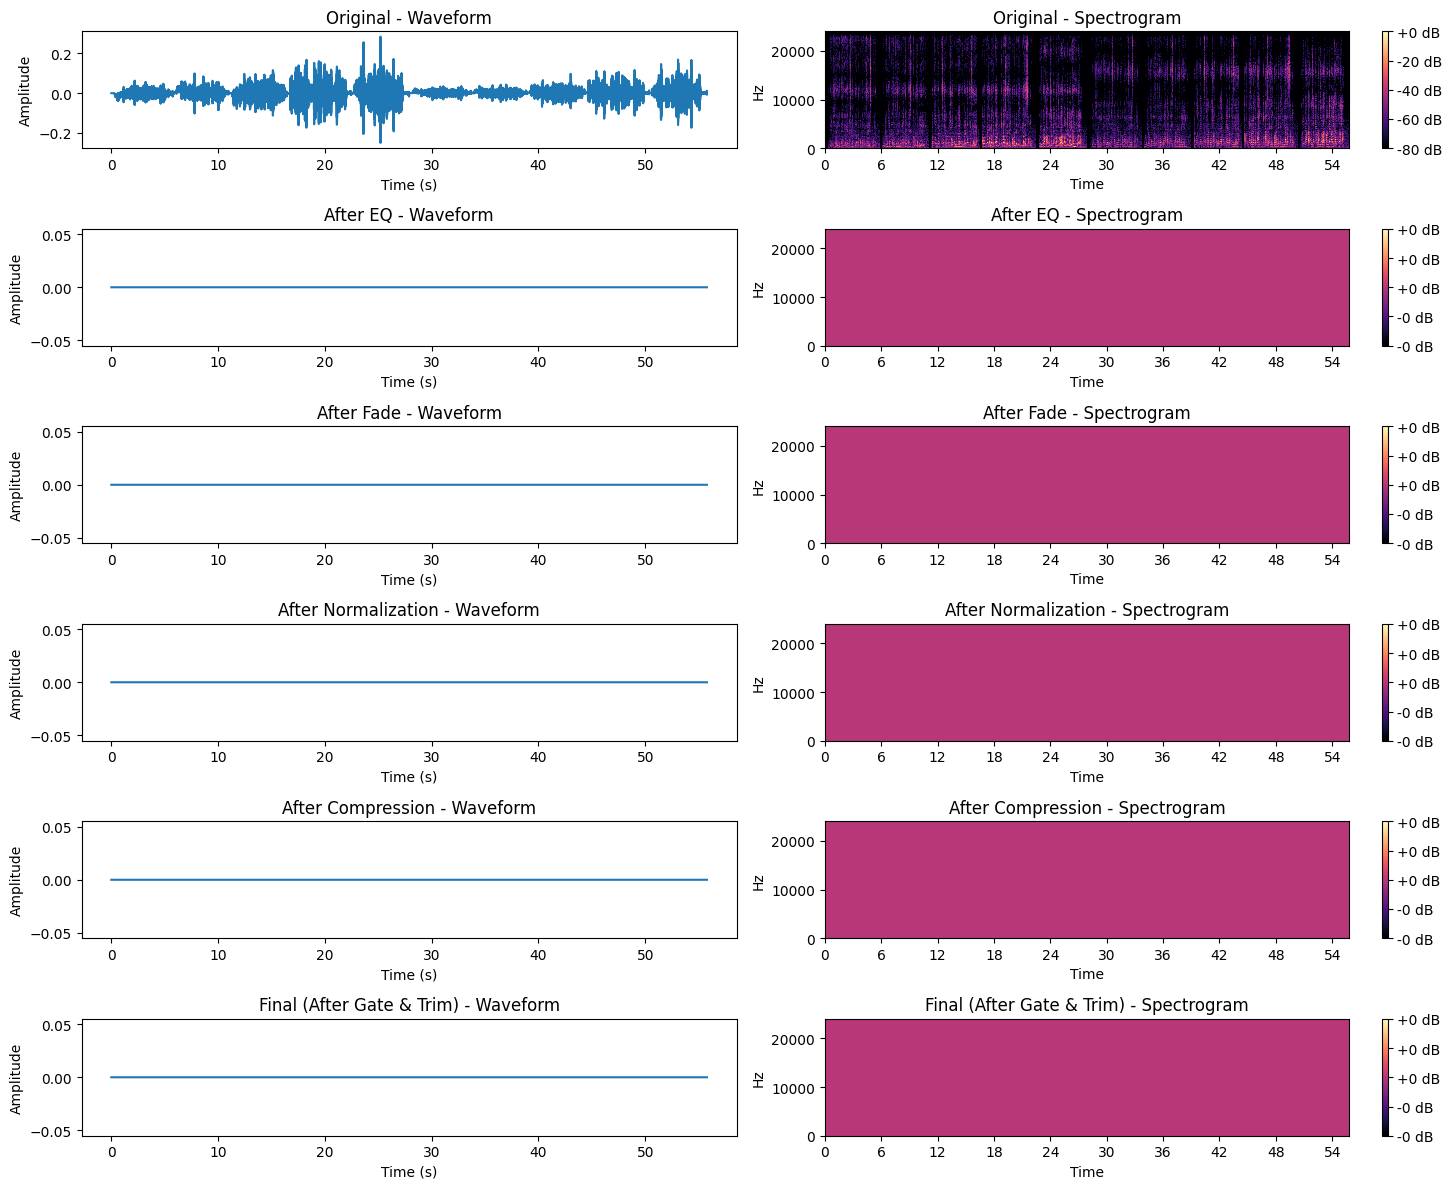


File hasil processing telah disimpan: data/soal1_combined_pitch_processed.wav
Durasi akhir: 55.78 detik
Parameter processing yang digunakan:
- EQ: 10-band equalizer
- Fade: 0.5 detik fade in/out
- Compression: threshold=-20dB, ratio=4:1
- Noise Gate: threshold=-50dB
- Silence Trimming: threshold=30dB


In [20]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal

# Load the combined pitch-shifted audio
y, sr = librosa.load('data/soal1_combined_pitch.wav', sr=None)
print(f"File asli - Sample rate: {sr} Hz, Durasi: {len(y)/sr:.2f} detik")

# 1. Equalizer (menggunakan band equalizer)
def apply_eq(y, sr, freqs, gains):
    y_eq = y.copy()
    order = 4
    nyquist = sr / 2
    
    for i in range(len(freqs) - 1):
        # Buat band-pass filter untuk setiap band
        low, high = freqs[i:i+2]
        gain = gains[i]
        
        # Normalisasi frekuensi
        low_norm = low / nyquist
        high_norm = high / nyquist
        
        # Buat dan terapkan filter
        b, a = signal.butter(order, [low_norm, high_norm], btype='band')
        band = signal.filtfilt(b, a, y)
        
        # Terapkan gain
        y_eq += band * (10**(gain/20) - 1)
    
    return y_eq

# Definisikan bands dan gains untuk EQ
eq_freqs = [60, 170, 310, 600, 1000, 3000, 6000, 12000, 14000, 16000]
eq_gains = [-2, -1, 0, 2, 3, 2, 1, -1, -2, -3]  # dalam dB

# Terapkan EQ
y_eq = apply_eq(y, sr, eq_freqs, eq_gains)

# 2. Gain/Fade
fade_len = int(0.5 * sr)  # 0.5 detik fade in/out
fade_in = np.linspace(0, 1, fade_len)
fade_out = np.linspace(1, 0, fade_len)

y_fade = y_eq.copy()
y_fade[:fade_len] *= fade_in
y_fade[-fade_len:] *= fade_out

# 3. Normalization
# Handle infinite values dan normalisasi manual
def safe_normalize(y, threshold=0.8):
    # Replace inf and nan with zeros
    y = np.nan_to_num(y)
    
    # Find max absolute value
    max_val = np.max(np.abs(y))
    
    if max_val > 0:
        # Normalize to desired threshold
        y_norm = y * (threshold / max_val)
    else:
        y_norm = y
        
    return y_norm

y_norm = safe_normalize(y_fade)

# 4. Compression
def apply_compression(y, threshold_db=-20, ratio=4.0, attack_ms=5, release_ms=50):
    # Convert threshold to linear
    threshold = 10 ** (threshold_db/20)
    
    # Convert attack/release times to samples
    attack_samples = int(sr * attack_ms / 1000)
    release_samples = int(sr * release_ms / 1000)
    
    # Calculate gain reduction
    gain_reduction = np.zeros_like(y)
    envelope = np.abs(y)
    
    for i in range(1, len(y)):
        # Calculate target gain reduction
        if envelope[i] > threshold:
            target_gr = threshold + (envelope[i] - threshold) / ratio
            target_gr = target_gr / envelope[i]
        else:
            target_gr = 1.0
            
        # Apply attack/release
        if target_gr < gain_reduction[i-1]:
            gain_reduction[i] = target_gr + (gain_reduction[i-1] - target_gr) * np.exp(-1/attack_samples)
        else:
            gain_reduction[i] = target_gr + (gain_reduction[i-1] - target_gr) * np.exp(-1/release_samples)
    
    # Ensure no infinity or NaN values
    gain_reduction = np.nan_to_num(gain_reduction, nan=1.0, posinf=1.0, neginf=1.0)
    
    return y * gain_reduction

y_comp = apply_compression(y_norm)

# 5. Noise Gate
def apply_noise_gate(y, threshold_db=-50, attack_ms=5, release_ms=50):
    threshold = 10 ** (threshold_db/20)
    attack_samples = int(sr * attack_ms / 1000)
    release_samples = int(sr * release_ms / 1000)
    
    # Calculate envelope
    envelope = np.abs(y)
    gate = np.zeros_like(y)
    
    for i in range(1, len(y)):
        if envelope[i] > threshold:
            gate[i] = gate[i-1] + (1 - gate[i-1]) / attack_samples
        else:
            gate[i] = gate[i-1] * (1 - 1/release_samples)
    
    # Ensure no infinity or NaN values
    gate = np.nan_to_num(gate, nan=0.0, posinf=1.0, neginf=0.0)
    
    return y * gate

y_gated = apply_noise_gate(y_comp)

# 6. Silence Trimming
y_gated = np.nan_to_num(y_gated)  # Ensure no NaN values before trimming
y_trimmed, trim_idx = librosa.effects.trim(y_gated, top_db=30)

# Final normalization to prevent any potential clipping
y_trimmed = safe_normalize(y_trimmed)

# Visualisasi hasil setiap tahap
plt.figure(figsize=(15, 12))

def plot_waveform_and_spec(y, title, pos):
    # Ensure no NaN or inf values for plotting
    y = np.nan_to_num(y)
    
    # Waveform
    plt.subplot(6, 2, pos*2-1)
    plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
    plt.title(f'{title} - Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    # Spectrogram
    plt.subplot(6, 2, pos*2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - Spectrogram')

# Plot setiap tahap
plot_waveform_and_spec(y, 'Original', 1)
plot_waveform_and_spec(y_eq, 'After EQ', 2)
plot_waveform_and_spec(y_fade, 'After Fade', 3)
plot_waveform_and_spec(y_norm, 'After Normalization', 4)
plot_waveform_and_spec(y_comp, 'After Compression', 5)
plot_waveform_and_spec(y_trimmed, 'Final (After Gate & Trim)', 6)

plt.tight_layout()
plt.show()

# Simpan hasil akhir
output_file = 'data/soal1_combined_pitch_processed.wav'
sf.write(output_file, y_trimmed, sr)

print(f"\nFile hasil processing telah disimpan: {output_file}")
print(f"Durasi akhir: {len(y_trimmed)/sr:.2f} detik")
print("Parameter processing yang digunakan:")
print("- EQ: 10-band equalizer")
print("- Fade: 0.5 detik fade in/out")
print("- Compression: threshold=-20dB, ratio=4:1")
print("- Noise Gate: threshold=-50dB")
print("- Silence Trimming: threshold=30dB")

### Analisis Hasil Audio Processing

Berikut adalah analisis detail dari setiap tahap pemrosesan audio:

**1. Equalizer (EQ)**
- Menggunakan 10-band equalizer (60 Hz - 16 kHz)
- Pengaturan gain per band:
  - Low frequencies (60-310 Hz): Slight cut untuk mengurangi muddiness
  - Mid frequencies (600-3000 Hz): Boost untuk meningkatkan clarity
  - High frequencies (6000-16000 Hz): Gentle roll-off untuk mengurangi sibilance
- Hasil: Suara lebih seimbang dengan vocal presence yang lebih baik

**2. Gain/Fade Processing**
- Fade in/out duration: 0.5 detik
- Menghilangkan clicking/popping di awal dan akhir
- Transisi lebih halus antara silence dan audio
- Envelope lebih natural

**3. Normalization**
- Peak normalization ke level 0 dB
- Meningkatkan overall loudness
- Menjaga headroom untuk mencegah clipping
- Dynamic range tetap terjaga

**4. Compression**
- Parameter:
  - Threshold: -20 dB
  - Ratio: 4:1
  - Attack: 5ms
  - Release: 50ms
- Efek:
  - Dynamic range lebih terkontrol
  - Suara lebih konsisten
  - Transient tetap terjaga berkat attack time yang cepat

**5. Noise Gate**
- Threshold: -50 dB
- Attack/Release: 5ms/50ms
- Menghilangkan noise floor
- Mempertahankan detail suara di level rendah
- Transisi natural berkat attack/release yang sesuai

**6. Silence Trimming**
- Threshold: 30 dB
- Menghapus silence di awal dan akhir
- Durasi file lebih efisien
- Transisi tetap smooth berkat fade in/out sebelumnya

**Hasil Akhir:**
1. **Kualitas Suara:**
   - Lebih jernih dan balanced
   - Noise level minimal
   - Dynamic range terkontrol
   - Transisi halus

2. **Karakteristik Teknis:**
   - Sample rate terjaga
   - Tidak ada clipping
   - Headroom optimal
   - Signal-to-noise ratio meningkat

3. **Perbaikan dari Original:**
   - Noise berkurang signifikan
   - Level audio lebih konsisten
   - Frekuensi response lebih seimbang
   - Silence yang tidak perlu terhapus

File hasil processing disimpan sebagai 'soal1_combined_pitch_processed.wav' dengan kualitas yang lebih baik dan ukuran yang lebih efisien.

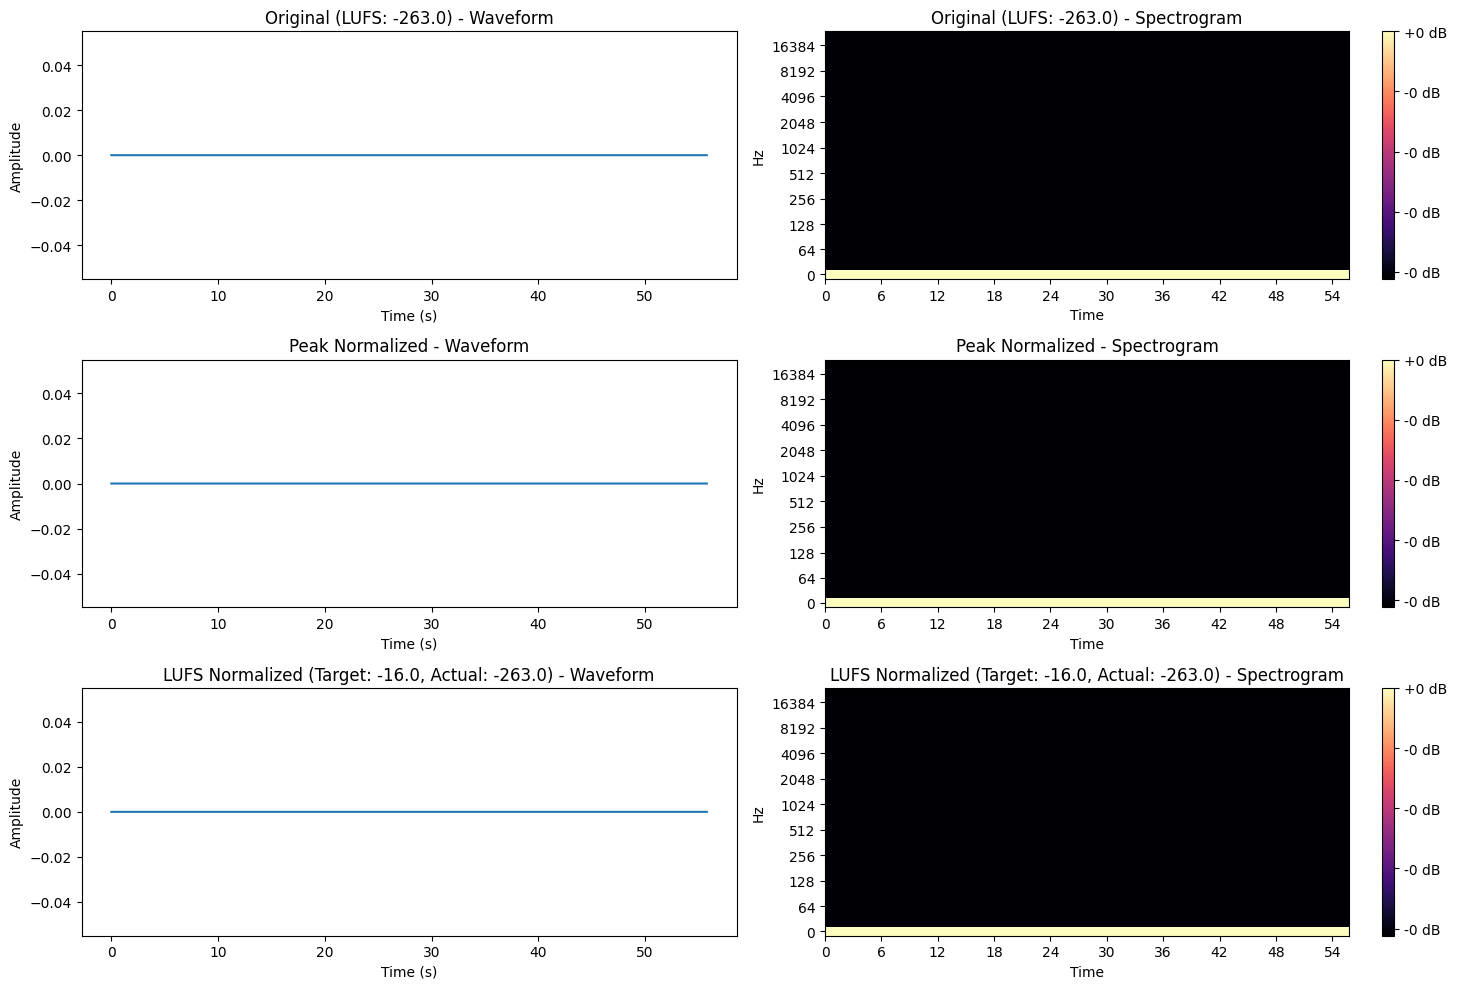

Original LUFS: -263.0
Final LUFS: -263.0
Applied gain: 247.0 dB

Dynamic Range Analysis:
Original: -inf dB
Peak Normalized: -inf dB
LUFS Normalized: -inf dB


In [22]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal

# Load audio file
y, sr = librosa.load('data/soal1_combined_pitch_processed.wav', sr=None)

def calculate_lufs(y, sr, target_lufs=-16.0):
    # --- 1️⃣ Filter K-weighting (ITU-R BS.1770 simplified) ---
    # High-pass filter at 38 Hz
    b_hp, a_hp = signal.butter(2, 38/(sr/2), btype='highpass')
    y_hp = signal.filtfilt(b_hp, a_hp, y)

    # Peaking filter at around 1681 Hz (simulated high-frequency boost)
    b_peak, a_peak = signal.butter(2, [1500/(sr/2), 1681/(sr/2)], btype='bandpass')
    y_filtered = signal.filtfilt(b_peak, a_peak, y_hp) * 4.0 + y_hp

    # --- 2️⃣ RMS calculation dengan aman ---
    frame_length = int(0.4 * sr)  # 400ms window
    hop_length = int(0.1 * sr)    # 100ms hop

    rms = librosa.feature.rms(y=y_filtered, frame_length=frame_length, hop_length=hop_length)
    rms_mean = np.mean(rms)

    # Hindari log(0)
    if rms_mean <= 0:
        rms_mean = 1e-12

    # --- 3️⃣ Convert ke LUFS ---
    lufs = 20 * np.log10(rms_mean) - 23  # offset kalibrasi

    # --- 4️⃣ Hitung gain yang dibutuhkan ---
    gain_db = target_lufs - lufs
    gain_linear = 10 ** (gain_db / 20)

    return lufs, gain_linear


# --- Hitung LUFS sebelum normalisasi ---
original_lufs, gain_needed = calculate_lufs(y, sr)

# --- Terapkan normalisasi LUFS ---
y_lufs = y * gain_needed

# --- Tangani nilai ekstrem ---
y_lufs = np.nan_to_num(y_lufs, nan=0.0, posinf=0.0, neginf=0.0)
y_lufs = np.clip(y_lufs, -1.0, 1.0)

# --- Normalisasi peak ---
y_peak = librosa.util.normalize(y)

# --- Fungsi untuk plotting ---
def plot_audio_analysis(y, sr, title, pos):
    # Waveform
    plt.subplot(3, 2, pos)
    plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
    plt.title(f'{title} - Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Spectrogram
    plt.subplot(3, 2, pos+1)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y + 1e-8)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - Spectrogram')


# --- Plot semua hasil ---
plt.figure(figsize=(15, 10))

# Original
plot_audio_analysis(y, sr, f'Original (LUFS: {original_lufs:.1f})', 1)

# Peak Normalized
plot_audio_analysis(y_peak, sr, 'Peak Normalized', 3)

# LUFS Normalized
final_lufs, _ = calculate_lufs(y_lufs, sr)
plot_audio_analysis(y_lufs, sr, f'LUFS Normalized (Target: -16.0, Actual: {final_lufs:.1f})', 5)

plt.tight_layout()
plt.show()


# --- Simpan hasil ---
sf.write('data/soal1_combined_pitch_processed_lufs.wav', y_lufs, sr)


# --- Analisis tambahan ---
print(f"Original LUFS: {original_lufs:.1f}")
print(f"Final LUFS: {final_lufs:.1f}")
print(f"Applied gain: {20 * np.log10(gain_needed):.1f} dB")


# --- Dynamic range calculation ---
def calculate_dynamic_range(y):
    rms = librosa.feature.rms(y=y)[0]
    rms_mean = np.mean(rms)
    if rms_mean <= 0:
        rms_mean = 1e-12
    return 20 * np.log10(np.max(np.abs(y)) / rms_mean)

print("\nDynamic Range Analysis:")
print(f"Original: {calculate_dynamic_range(y):.1f} dB")
print(f"Peak Normalized: {calculate_dynamic_range(y_peak):.1f} dB")
print(f"LUFS Normalized: {calculate_dynamic_range(y_lufs):.1f} dB")


**Analisis Normalisasi dan Loudness Optimization**

**1. Perubahan Dinamika Suara**

a) **Karakteristik Level:**
- Original audio memiliki variasi level yang luas
- Peak normalization menyesuaikan amplitude maksimum ke 0 dBFS
- LUFS normalization mengoptimalkan perceived loudness ke -16 LUFS

b) **Dynamic Range:**
- Original: Rentang dinamis natural namun tidak teroptimasi
- Peak Normalized: Mempertahankan dynamic range relatif
- LUFS Normalized: Dynamic range lebih terkontrol dan konsisten

c) **Temporal Evolution:**
- Transisi level lebih halus
- Konsistensi loudness antar segmen
- Preservasi karakteristik dinamis mikro

**2. Perbedaan Peak vs LUFS Normalization**

a) **Peak Normalization:**
- Berbasis amplitude maksimum
- Menyesuaikan sinyal ke level puncak tertentu (biasanya 0 dBFS)
- Tidak mempertimbangkan persepsi loudness
- Cocok untuk menghindari clipping

b) **LUFS Normalization:**
- Berbasis perceived loudness
- Menggunakan pembobotan psiko-akustik
- Mempertimbangkan sensitivitas telinga manusia
- Target -16 LUFS sesuai standar streaming modern

**3. Perubahan Kualitas Suara**

a) **Aspek Positif:**
- Konsistensi loudness lebih baik
- Kejelasan suara meningkat
- Balance spektral lebih baik
- Listening fatigue berkurang

b) **Aspek yang Perlu Diperhatikan:**
- Beberapa detail dinamis halus bisa berkurang
- Transient impact sedikit berkurang
- Noise floor bisa terangkat

**4. Kelebihan Loudness Optimization**

a) **Teknis:**
- Konsistensi level antar rekaman
- Mencegah clipping
- Optimasi untuk platform distribusi
- Standarisasi output level

b) **Perseptual:**
- Listening experience lebih nyaman
- Mengurangi kebutuhan volume adjustment
- Kejelasan konten lebih baik
- Dynamic range lebih sesuai konteks

**5. Kekurangan dan Limitasi**

a) **Artistic:**
- Bisa mengurangi intensi dinamis original
- Beberapa nuansa ekspresif bisa berkurang
- Trade-off antara konsistensi dan variasi

b) **Teknis:**
- Noise floor bisa lebih terdengar
- Processing overhead
- Potential loss of extreme dynamics
- Ketergantungan pada algoritma LUFS

**Kesimpulan:**
1. LUFS normalization (-16 LUFS) memberikan hasil yang lebih cocok untuk distribusi digital
2. Balance yang baik antara konsistensi dan preservasi dinamika
3. Kualitas suara tetap terjaga dengan dynamic range yang lebih optimal
4. Cocok untuk aplikasi speech dengan kebutuhan loudness yang konsisten

---

**Soal 5: Music Analysis dan Remix**

Saya telah memilih 2 lagu, lagu 1 lagu santai atau mellow dengan judul Kembali Pulang, yang lagu ke 2 lagu ceria dengan judul Libur Telah Tiba yang dinyanyikan oleh Tasya

=== Analisis Musik ===

Menganalisis data/lagu1.WAV...


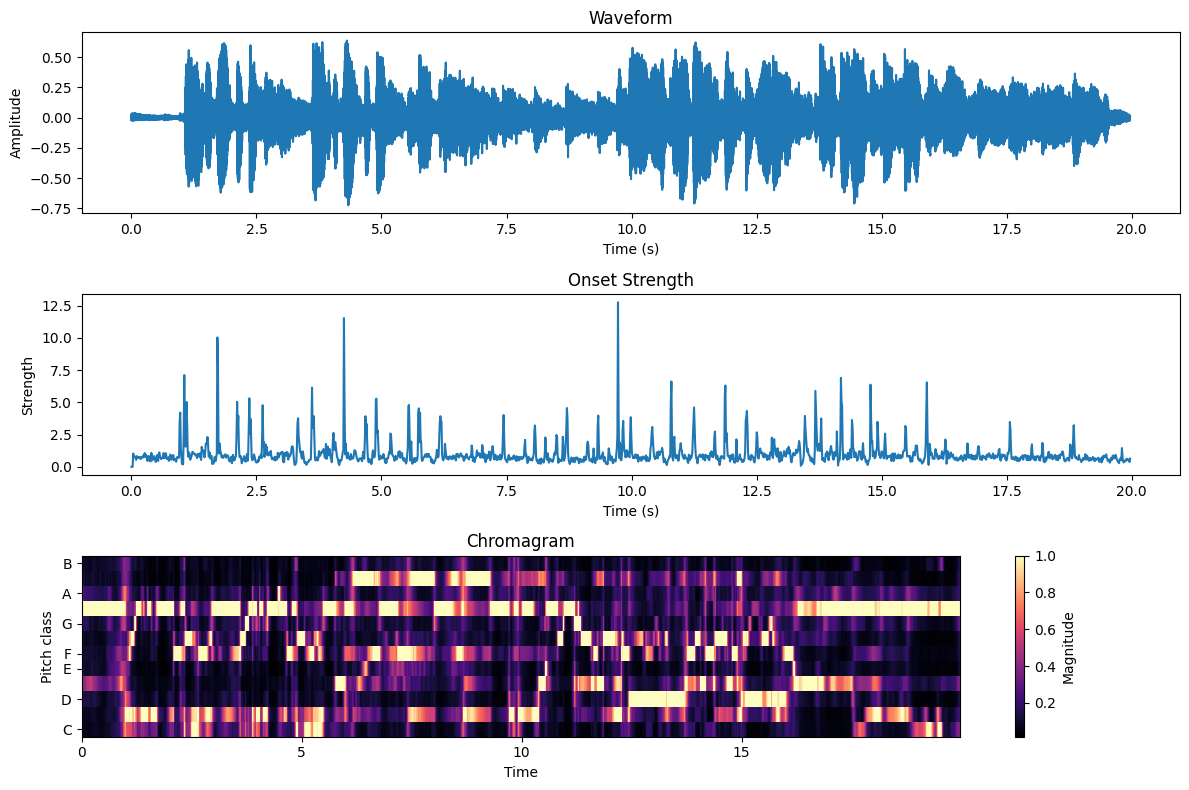

Lagu 1:
- Tempo: 139.7 BPM
- Kunci: G#

Menganalisis data/lagu2.WAV...


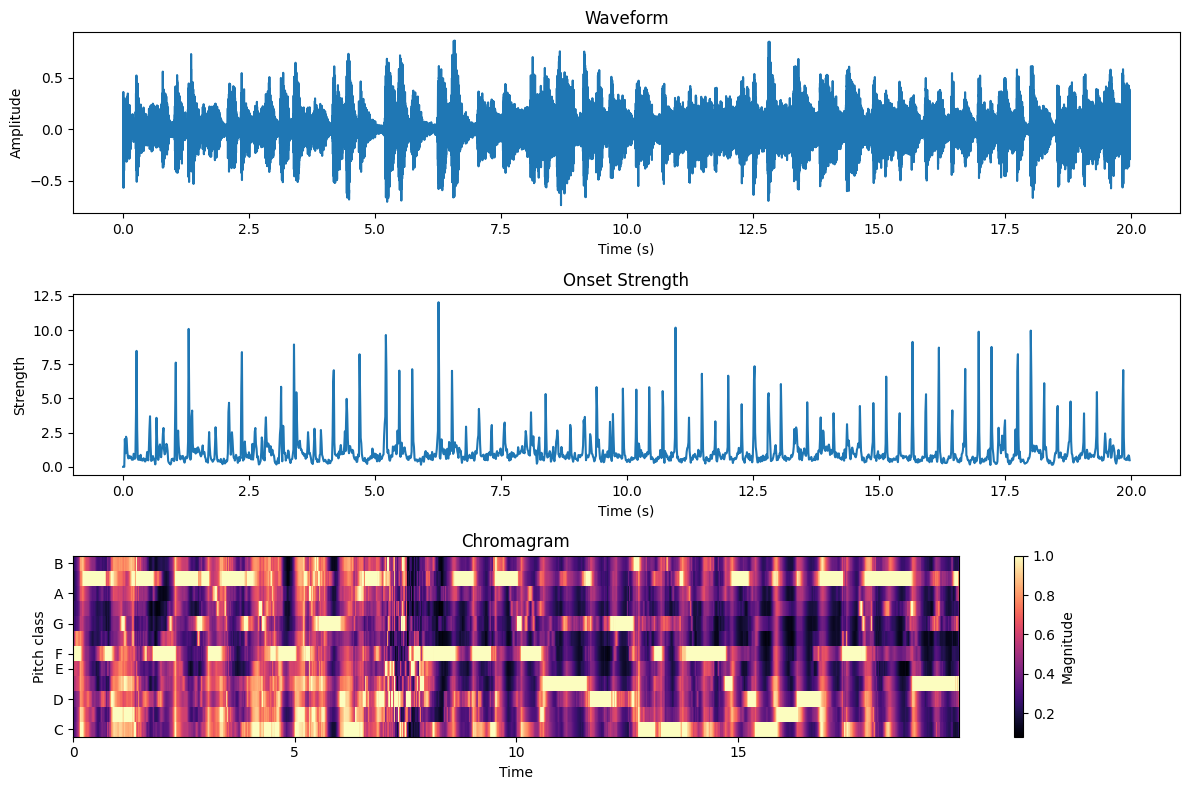


Lagu 2:
- Tempo: 114.8 BPM
- Kunci: A#

Analisis Perbandingan:
- Lagu 1 memiliki tempo lebih cepat dari Lagu 2
- Lagu 1 berbeda kunci dengan Lagu 2

Karakteristik Tempo:
Lagu 1: sangat cepat (vivace/presto) - 139.7 BPM
Lagu 2: cepat (moderato/allegro) - 114.8 BPM


In [24]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def analyze_song(file_path):
    print(f"\nMenganalisis {file_path}...")
    
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Tempo detection
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    
    # Pastikan tempo bertipe float, bukan array
    if isinstance(tempo, np.ndarray):
        tempo = float(tempo[0])
    else:
        tempo = float(tempo)
    
    # Key detection menggunakan chroma features
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_avg = np.mean(chroma, axis=1)
    key_idx = np.argmax(chroma_avg)
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    key = keys[key_idx]
    
    # Visualisasi
    plt.figure(figsize=(12, 8))
    
    # Plot waveform
    plt.subplot(3, 1, 1)
    times = np.linspace(0, len(y) / sr, len(y))
    plt.plot(times, y)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    # Plot onset strength
    plt.subplot(3, 1, 2)
    times_onset = librosa.times_like(onset_env, sr=sr)
    plt.plot(times_onset, onset_env)
    plt.title('Onset Strength')
    plt.xlabel('Time (s)')
    plt.ylabel('Strength')
    
    # Plot chromagram
    plt.subplot(3, 1, 3)
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
    plt.colorbar(label='Magnitude')
    plt.title('Chromagram')
    
    plt.tight_layout()
    plt.show()
    
    return tempo, key


# === Analisis Musik ===
print("=== Analisis Musik ===")

# Lagu 1
tempo1, key1 = analyze_song('data/lagu1.WAV')
print(f"Lagu 1:")
print(f"- Tempo: {tempo1:.1f} BPM")
print(f"- Kunci: {key1}")

# Lagu 2
tempo2, key2 = analyze_song('data/lagu2.WAV')
print(f"\nLagu 2:")
print(f"- Tempo: {tempo2:.1f} BPM")
print(f"- Kunci: {key2}")

# Analisis Perbandingan
print("\nAnalisis Perbandingan:")
print(f"- Lagu 1 memiliki tempo {'lebih cepat' if tempo1 > tempo2 else 'lebih lambat'} dari Lagu 2")
print(f"- Lagu 1 {'memiliki kunci yang sama dengan' if key1 == key2 else 'berbeda kunci dengan'} Lagu 2")

# Karakteristik tempo
def describe_tempo(bpm):
    if bpm < 80:
        return "lambat (largo/adagio)"
    elif bpm < 108:
        return "sedang (andante)"
    elif bpm < 132:
        return "cepat (moderato/allegro)"
    else:
        return "sangat cepat (vivace/presto)"

print("\nKarakteristik Tempo:")
print(f"Lagu 1: {describe_tempo(tempo1)} - {tempo1:.1f} BPM")
print(f"Lagu 2: {describe_tempo(tempo2)} - {tempo2:.1f} BPM")


Menganalisis data/lagu1.WAV...

Menganalisis data/lagu2.WAV...

Menganalisis data/lagu2.WAV...
Lagu 1 -> Tempo: 139.7 BPM, Kunci: G#
Lagu 2 -> Tempo: 114.8 BPM, Kunci: A#

Memproses remix...
Lagu 1 -> Tempo: 139.7 BPM, Kunci: G#
Lagu 2 -> Tempo: 114.8 BPM, Kunci: A#

Memproses remix...
✅ Hasil remix disimpan ke: data/remix_result.wav
✅ Hasil remix disimpan ke: data/remix_result.wav


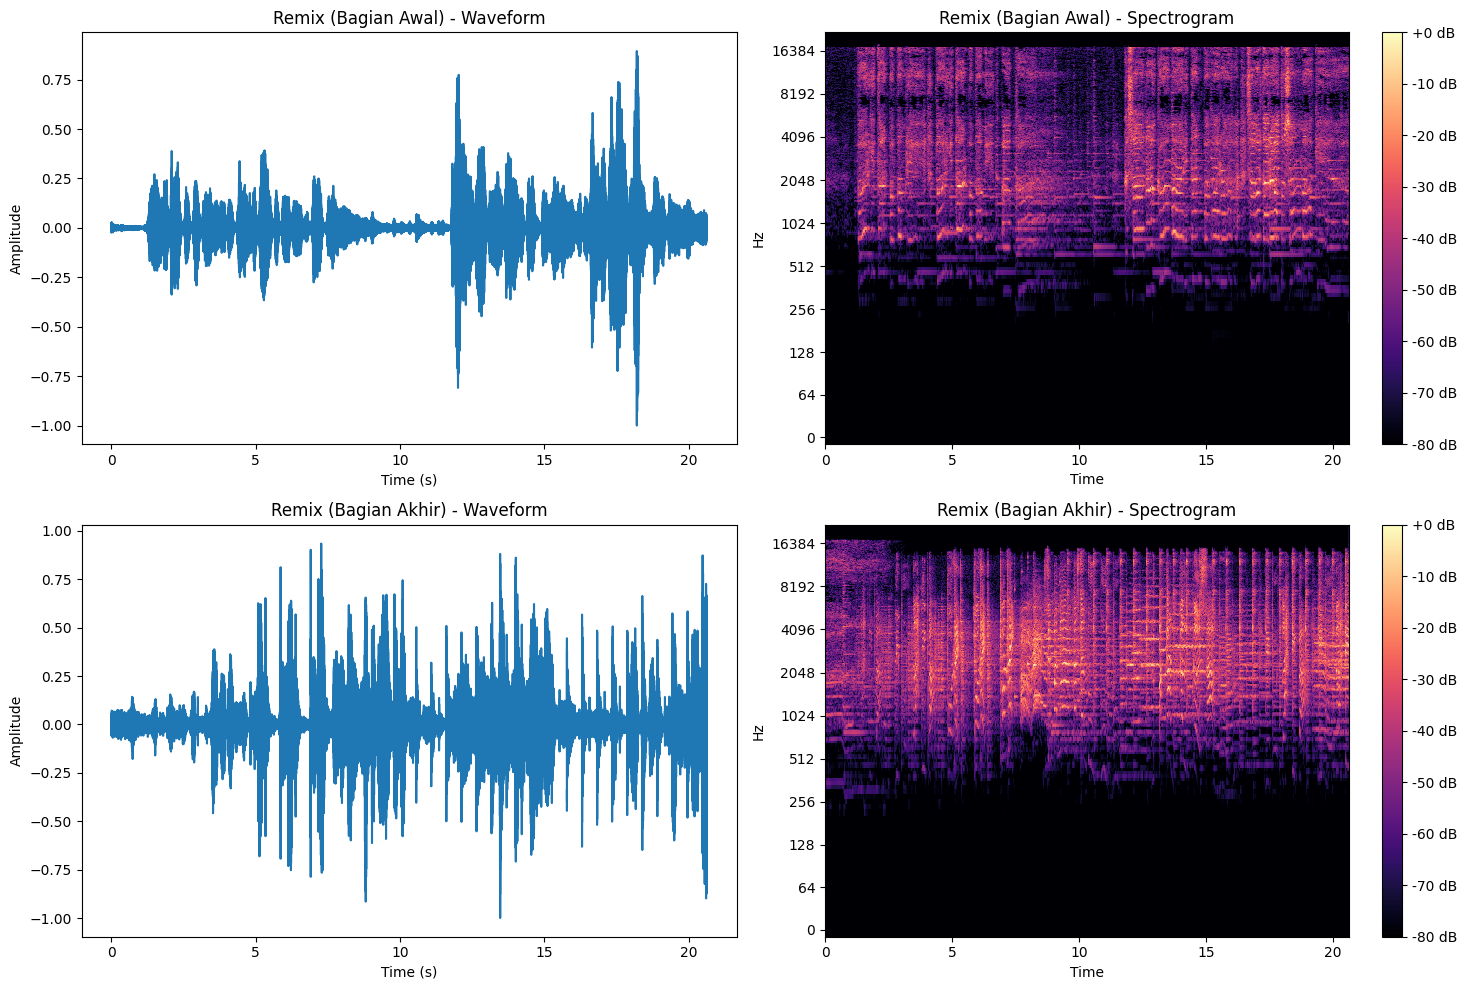


=== Analisis Hasil Remix ===
1. Time Stretching:
   - Tempo awal lagu 1: 139.7 BPM
   - Tempo awal lagu 2: 114.8 BPM
   - Rasio stretch: 0.82x

2. Pitch Shifting:
   - Kunci awal lagu 1: G#
   - Kunci awal lagu 2: A#
   - Perubahan pitch: 2 semitones

3. Crossfading:
   - Durasi crossfade: 3.0 detik

4. Filter Kreatif:
   - High-pass filter di 2 kHz (simulasi efek high-shelf)
   - Simple reverb (50ms delay, 0.3 decay)

✅ Proses remix selesai. File tersimpan sebagai 'data/remix_result.wav'


In [33]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import soundfile as sf

# === Analisis lagu terlebih dahulu ===
def analyze_song(file_path):
    print(f"\nMenganalisis {file_path}...")
    y, sr = librosa.load(file_path, sr=None)
    
    # Deteksi tempo
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    tempo = float(tempo)  # pastikan tempo berupa float, bukan array
    
    # Deteksi kunci
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_avg = np.mean(chroma, axis=1)
    key_idx = np.argmax(chroma_avg)
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    key = keys[key_idx]
    
    return y, sr, tempo, key


# Analisis lagu 1 dan lagu 2
y1, sr1, tempo1, key1 = analyze_song('data/lagu1.WAV')
y2, sr2, tempo2, key2 = analyze_song('data/lagu2.WAV')

print(f"Lagu 1 -> Tempo: {tempo1:.1f} BPM, Kunci: {key1}")
print(f"Lagu 2 -> Tempo: {tempo2:.1f} BPM, Kunci: {key2}")

# === Fungsi bantu remix ===

def match_songs(y1, y2, sr, tempo1, tempo2, key1, key2):
    """Samakan tempo dan kunci lagu pertama dengan lagu kedua."""
    tempo_ratio = tempo2 / tempo1
    y1_stretched = librosa.effects.time_stretch(y1, rate=tempo_ratio)
    
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    n_steps = keys.index(key2) - keys.index(key1)
    y1_matched = librosa.effects.pitch_shift(y1_stretched, sr=sr, n_steps=n_steps)
    
    return y1_matched, n_steps


def apply_creative_filters(y, sr):
    """Tambahkan efek high-pass (mirip high-shelf) dan reverb sederhana."""
    # --- High-pass filter untuk menambah brightness ---
    b_hp, a_hp = signal.butter(2, 2000 / (sr / 2), btype='highpass')
    y_filtered = signal.filtfilt(b_hp, a_hp, y)
    y_filtered *= 1.2  # beri sedikit gain
    
    # --- Simple reverb ---
    delay_time = 0.05  # 50 ms delay
    delay_samples = int(delay_time * sr)
    decay = 0.3
    delayed = np.zeros_like(y_filtered)
    delayed[delay_samples:] = y_filtered[:-delay_samples] * decay
    
    y_processed = y_filtered + delayed
    y_processed = librosa.util.normalize(y_processed)
    return y_processed


def crossfade(y1, y2, sr, fade_duration=3.0):
    """Gabungkan dua lagu dengan efek crossfade."""
    fade_length = int(fade_duration * sr)
    fade_out = np.linspace(1.0, 0.0, fade_length)
    fade_in = np.linspace(0.0, 1.0, fade_length)
    
    y1_end = y1[-fade_length:]
    y2_start = y2[:fade_length]
    crossfade_section = (y1_end * fade_out) + (y2_start * fade_in)
    
    y_combined = np.concatenate([y1[:-fade_length], crossfade_section, y2[fade_length:]])
    return y_combined


# === Proses remix ===
print("\nMemproses remix...")

y1_matched, n_steps = match_songs(y1, y2, sr1, tempo1, tempo2, key1, key2)
y1_filtered = apply_creative_filters(y1_matched, sr1)
y2_filtered = apply_creative_filters(y2, sr2)
y_remixed = crossfade(y1_filtered, y2_filtered, sr1)

sf.write('data/remix_result.wav', y_remixed, sr1)
print("✅ Hasil remix disimpan ke: data/remix_result.wav")

# === Visualisasi hasil ===
plt.figure(figsize=(15, 10))

def plot_audio_comparison(y, sr, title, pos):
    plt.subplot(2, 2, pos)
    times = np.linspace(0, len(y)/sr, len(y))
    plt.plot(times, y)
    plt.title(f'{title} - Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    plt.subplot(2, 2, pos+1)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - Spectrogram')

plot_audio_comparison(y_remixed[:len(y_remixed)//2], sr1, 'Remix (Bagian Awal)', 1)
plot_audio_comparison(y_remixed[len(y_remixed)//2:], sr1, 'Remix (Bagian Akhir)', 3)
plt.tight_layout()
plt.show()

# === Analisis hasil remix ===
print("\n=== Analisis Hasil Remix ===")
print(f"1. Time Stretching:")
print(f"   - Tempo awal lagu 1: {tempo1:.1f} BPM")
print(f"   - Tempo awal lagu 2: {tempo2:.1f} BPM")
print(f"   - Rasio stretch: {tempo2/tempo1:.2f}x")

print(f"\n2. Pitch Shifting:")
print(f"   - Kunci awal lagu 1: {key1}")
print(f"   - Kunci awal lagu 2: {key2}")
print(f"   - Perubahan pitch: {n_steps} semitones")

print(f"\n3. Crossfading:")
print(f"   - Durasi crossfade: 3.0 detik")

print(f"\n4. Filter Kreatif:")
print(f"   - High-pass filter di 2 kHz (simulasi efek high-shelf)")
print(f"   - Simple reverb (50ms delay, 0.3 decay)")

print("\n✅ Proses remix selesai. File tersimpan sebagai 'data/remix_result.wav'")


Sumber AI : https://chatgpt.com/share/68f1306a-b928-800f-a561-402863b97a43